In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!unzip "AMIGOS.zip"

Archive:  AMIGOS.zip
  inflating: AMIGOS/Data_Preprocessed_P01.mat  
  inflating: AMIGOS/Data_Preprocessed_P02.mat  
  inflating: AMIGOS/Data_Preprocessed_P03.mat  
  inflating: AMIGOS/Data_Preprocessed_P04.mat  
  inflating: AMIGOS/Data_Preprocessed_P05.mat  
  inflating: AMIGOS/Data_Preprocessed_P06.mat  
  inflating: AMIGOS/Data_Preprocessed_P07.mat  
  inflating: AMIGOS/Data_Preprocessed_P08.mat  
  inflating: AMIGOS/Data_Preprocessed_P09.mat  
  inflating: AMIGOS/Data_Preprocessed_P10.mat  
  inflating: AMIGOS/Data_Preprocessed_P11.mat  
  inflating: AMIGOS/Data_Preprocessed_P12.mat  
  inflating: AMIGOS/Data_Preprocessed_P13.mat  
  inflating: AMIGOS/Data_Preprocessed_P14.mat  
  inflating: AMIGOS/Data_Preprocessed_P15.mat  
  inflating: AMIGOS/Data_Preprocessed_P16.mat  
  inflating: AMIGOS/Data_Preprocessed_P17.mat  
  inflating: AMIGOS/Data_Preprocessed_P18.mat  
  inflating: AMIGOS/Data_Preprocessed_P19.mat  
  inflating: AMIGOS/Data_Preprocessed_P20.mat  
  inflating: AMIGOS

In [13]:
import scipy.io
data = scipy.io.loadmat("AMIGOS/Data_Preprocessed_P32.mat")

In [26]:
#data['joined_data'][0][19].shape
#data['labels_selfassessment'][0][15].shape
#data['joined_data'].shape[1]
#data['labels_selfassessment'][0][1][0].shape

(1, 12)

(10191,)

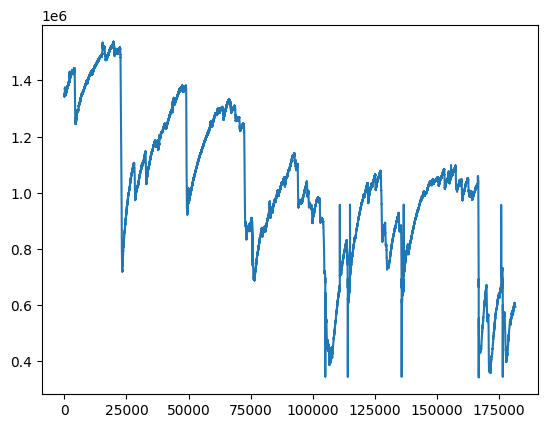

In [42]:
import matplotlib.pyplot as plt
plt.plot(data['joined_data'][0][16][384:,16])
data['joined_data'][0][3][384:,16].shape

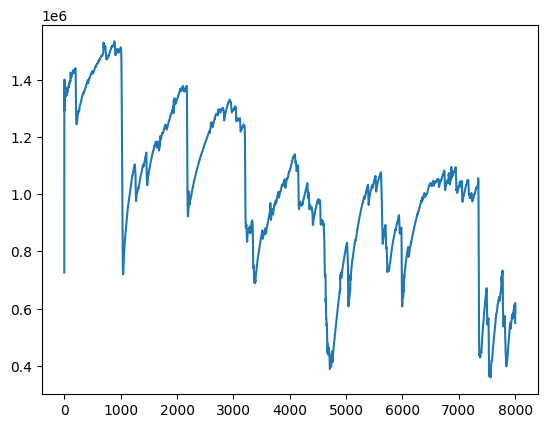

In [43]:
import scipy.io
y1 = scipy.signal.resample(data['joined_data'][0][16][:,16], 8000)
plt.plot(y1)


In [1]:
import glob
import os
filelist = glob.glob('AMIGOS/*.mat')
print(filelist)
subjectnames = [fr[25:28] for fr in filelist]
print(subjectnames)

['AMIGOS/Data_Preprocessed_P33.mat', 'AMIGOS/Data_Preprocessed_P30.mat', 'AMIGOS/Data_Preprocessed_P13.mat', 'AMIGOS/Data_Preprocessed_P26.mat', 'AMIGOS/Data_Preprocessed_P37.mat', 'AMIGOS/Data_Preprocessed_P31.mat', 'AMIGOS/Data_Preprocessed_P10.mat', 'AMIGOS/Data_Preprocessed_P09.mat', 'AMIGOS/Data_Preprocessed_P05.mat', 'AMIGOS/Data_Preprocessed_P40.mat', 'AMIGOS/Data_Preprocessed_P35.mat', 'AMIGOS/Data_Preprocessed_P32.mat', 'AMIGOS/Data_Preprocessed_P22.mat', 'AMIGOS/Data_Preprocessed_P23.mat', 'AMIGOS/Data_Preprocessed_P17.mat', 'AMIGOS/Data_Preprocessed_P04.mat', 'AMIGOS/Data_Preprocessed_P12.mat', 'AMIGOS/Data_Preprocessed_P34.mat', 'AMIGOS/Data_Preprocessed_P29.mat', 'AMIGOS/Data_Preprocessed_P15.mat', 'AMIGOS/Data_Preprocessed_P02.mat', 'AMIGOS/Data_Preprocessed_P25.mat', 'AMIGOS/Data_Preprocessed_P18.mat', 'AMIGOS/Data_Preprocessed_P36.mat', 'AMIGOS/Data_Preprocessed_P16.mat', 'AMIGOS/Data_Preprocessed_P28.mat', 'AMIGOS/Data_Preprocessed_P03.mat', 'AMIGOS/Data_Preprocessed_P

In [2]:
import scipy.io
import numpy as np
data_am = {}
skiplist = ['P28','P08','P24','P32']
newsubjectname = []
for sname in subjectnames:
    if sname in skiplist:
      continue
    newsubjectname.append(sname)
    dname = "AMIGOS/Data_Preprocessed_"+sname+".mat"
    x = scipy.io.loadmat(dname)
    print(sname)
    samples = []
    samples_labels = []
    for i in range(x['joined_data'].shape[1]):
        x1 = x['joined_data'][0][i]
        x2 = scipy.signal.resample(x1[384:,16], 8064)
        y1 = x['labels_selfassessment'][0][i][0][0:2]
        samples.append(x2)
        samples_labels.append(y1)
    samples_stack = np.vstack(samples)
    samples_labels_stack = np.vstack(samples_labels)
    data_am[sname] = [samples_stack,samples_labels_stack]

print(data_am.keys())

P33
P30
P13
P26
P37
P31
P10
P09
P05
P40
P35
P22
P23
P17
P04
P12
P34
P29
P15
P02
P25
P18
P36
P16
P03
P38
P39
P27
P01
P19
P06
P11
P21
P07
P14
P20
dict_keys(['P33', 'P30', 'P13', 'P26', 'P37', 'P31', 'P10', 'P09', 'P05', 'P40', 'P35', 'P22', 'P23', 'P17', 'P04', 'P12', 'P34', 'P29', 'P15', 'P02', 'P25', 'P18', 'P36', 'P16', 'P03', 'P38', 'P39', 'P27', 'P01', 'P19', 'P06', 'P11', 'P21', 'P07', 'P14', 'P20'])


In [8]:
data_am['P01'][0]

array([3237180.31474926, 3110649.65303398, 3179062.7496687 , ...,
       3514282.08715568, 3478618.13315719, 3540966.49534216])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data_cam = {}
for k,v in data_am.items():
    y = v[0]
    ym = np.mean(y,axis=-1).reshape(20,1)
    ystd = np.std(y,axis=-1).reshape(20,1)
    z = (y-ym)/ystd
    #print(z.shape)
    data_cam[k] = [z,v[1]]

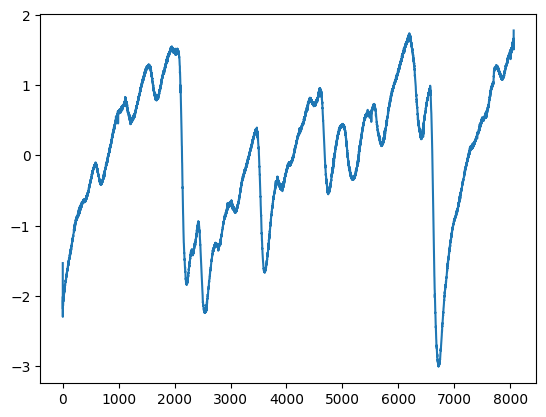

In [5]:
plt.plot(data_cam['P01'][0][0])

In [4]:
import torch
data_c1d = {}
BLOCK_SIZE=640
BLOCK_STRIDE=60
for k,v in data_cam.items():
    datablocki = []
    v1 = v[0]
    v1 = v1[:,np.newaxis,:]
    #print(v1.shape)
    data_c1d[k] = torch.tensor(v1)
print(data_c1d['P01'][0].shape)

torch.Size([1, 8064])


In [5]:
data_c2 = {}
for k,v in data_cam.items():
    y = v[1]
    x_label = np.zeros((y.shape[0]),dtype='float64')
    for i in range(y.shape[0]):
        if (y[i][0] > 5):
            x_label[i] = 1
        else:
            x_label[i] = 0

    x_l = x_label
    x_l = x_l.reshape(-1,1)
    x_l = torch.tensor(x_l)
    data_c2[k] = x_l

In [24]:
data_c2['P02']

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.]], dtype=torch.float64)

In [6]:
data_c2 = {}
maxnum = 3
for k,v in data_cam.items():
    y = v[1]
    x_label = np.zeros((y.shape[0]),dtype='int32')
    for i in range(y.shape[0]):
        if (y[i][1] > 5 and y[i][0] > 5):
            x_label[i] = 3
        elif (y[i][1] <= 5 and y[i][0] > 5):
            x_label[i] = 2
        elif (y[i][1] > 5 and y[i][0] <= 5):
            x_label[i] = 1
        elif (y[i][1] <= 5 and y[i][0] <= 5):
            x_label[i] = 0

    x_l = np.zeros((x_label.size, maxnum+1))
    x_l[np.arange(x_label.size), x_label] = 1

    x_l = torch.tensor(x_l)
    data_c2[k] = x_l


In [18]:
data_c2['P01'].shape

torch.Size([20, 4])

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from torchinfo import Summary
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1=nn.Conv1d(1, 34, 10,stride=1)
        self.mp1=nn.MaxPool1d(2)
        self.norm1 = nn.BatchNorm1d(34)
        self.d = nn.Dropout(p=0.63)
        self.c2=nn.Conv1d(34, 30, 10,stride=1)
        self.mp2=nn.MaxPool1d(2)
        self.c3=nn.Conv1d(30, 10, 10,stride=1)
        self.norm3 = nn.BatchNorm1d(10)
        self.mp3=nn.MaxPool1d(2)
        self.ft = nn.Flatten()

        self.n1 = nn.Linear(20070,110)
        #self.n1 = nn.Linear(19590,110)
        self.normfc1=nn.BatchNorm1d(110)
        self.d = nn.Dropout(p=0.63)
        #self.d = nn.Dropout()
        self.n2 = nn.Linear(110,100)
        self.n3 = nn.Linear(100,4)


    def forward(self, x):
        x = self.d(self.norm1(F.tanh(self.c1(x))))
        #x=F.tanh(self.c1(x))
        x = self.mp2(F.tanh(self.c2(x)))
        #print(x.shape)
        x = self.mp3(F.tanh(self.c3(x)))

        #print(x.shape)
        x = self.ft(x)
        #print(x.shape)
        x = F.tanh(self.n1(x))
        x=self.normfc1(x)
        #x=self.norm3(x)
        x=self.d(x)

        #x = F.softmax(self.n2(x),dim=-1)
        x = F.tanh(self.n2(x))
        #x = F.sigmoid(self.n3(x))

        x = (self.n3(x))
        #print(x.shape)
        return x


criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()



In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
#print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 60
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())

  '''
  for tr in test_index:
      net.eval()
      v = data_c1d[newsubjectname[tr]]
      l = data_c2[newsubjectname[tr]]
      net.eval()
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i].shape)
            #outputs1 = torch.softmax(outputs,dim=-1)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #loss.backward()
            actualoutput.append(torch.round(outputs.cpu()))
            expectedoutput.append(l[i:i+batch_sz])
            #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutput = np.concatenate( expectedoutput, axis=0 )
  actualoutput = np.concatenate( actualoutput, axis=0 )
  print(expectedoutput.shape)
  print(actualoutput.shape)
  print(classification_report(expectedoutput,actualoutput))
  print(confusion_matrix(expectedoutput,actualoutput))
  print(f'Validation Loss for {subjectnames[tr]} = {val_loss_mean}')
  #break
  '''
#plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
#plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
#plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
#plt.legend()
#path = "Model"+str(modelid) +".pt"
#path = "ModelAMIGOS_Aro.pt"
#modelid = modelid+1
#print(path)
#torch.save(net.state_dict(), path)

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


/tmp/ipykernel_203/3472248682.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1/60, Train Loss: 0.6609741449356079
Epoch 2/60, Train Loss: 0.6968510746955872
Epoch 3/60, Train Loss: 0.7063091397285461
Epoch 4/60, Train Loss: 0.7129724025726318
Epoch 5/60, Train Loss: 0.6755002737045288
Epoch 6/60, Train Loss: 0.677463948726654
Epoch 7/60, Train Loss: 0.7001715302467346
Epoch 8/60, Train Loss: 0.641160249710083
Epoch 9/60, Train Loss: 0.6524507403373718
Epoch 10/60, Train Loss: 0.6981868147850037
Epoch 11/60, Train Loss: 0.7125951051712036
Epoch 12/60, Train Loss: 0.6761418581008911
Epoch 13/60, Train Loss: 0.6650707125663757
Epoch 14/60, Train Loss: 0.6498364806175232
Epoch 15/60, Train Loss: 0.6750850081443787
Epoch 16/60, Train Loss: 0.7362504005432129
Epoch 17/60, Train Loss: 0.6782377362251282
Epoch 18/60, Train Loss: 0.6005708575248718
Epoch 19/60, Train Loss: 0.6484631896018982
Epoch 20/60, Train Loss: 0.6615355610847473
Epoch 21/60, Train Loss: 0.7476146817207336
Epoch 22/60, Train Loss: 0.6450007557868958
Epoch 23/60, Train Loss: 0.6990272998809814

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
batch_sz = 20
file_list_num = np.arange(len(subjectnames))
modelid = 1
netValence = Net()
valmodelname = "Valence_Model4"+".pt"
netValence.load_state_dict(torch.load(valmodelname))
netValence.to(device)
netArousal = Net()
aromodelname = "Model5"+".pt"
netArousal.load_state_dict(torch.load(aromodelname))
netArousal.to(device)
for i in range(0,32,4):

    #optimizer = optim.Adam(net.parameters(), lr=0.000001)
    expectedoutput = []
    actualoutput = []
    for tr in file_list_num[i:i+4]:
        #net.eval()
        v = data_c1d[subjectnames[tr]]
        l = data_c3[subjectnames[tr]]
        netValence.eval()
        netArousal.eval()
        with torch.no_grad():
            for i in range(0,len(v),batch_sz):
              #print(v[i].shape)
              #for j in range(0,v[i].shape[0],batch_sz):
              #optimizer.zero_grad()
              outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
              outputs_val1 = torch.round(outputs_val)
              outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
              outputs_aro1 = torch.round(outputs_aro)

              #print(outputs_val1)
              for j in range(0,outputs_aro1.shape[0]):
                res = 0
                if (outputs_val1[j][0] >= 1 and outputs_aro1[j][0] >= 1):
                    res = 4
                elif (outputs_val1[j][0] < 1 and outputs_aro1[j][0] >= 1):
                    res = 3
                elif (outputs_val1[j][0] >= 1 and outputs_aro1[j][0] < 1):
                    res = 2
                elif (outputs_val1[j][0] < 1 and outputs_aro1[j][0] < 1):
                    res = 1
                actualoutput.append(res)
              #loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
              #val_loss.append(loss)
              #loss.backward()
              #print(outputs.shape)
              #print(l[i:i+batch_sz])
              expectedoutput.append(l[i:i+batch_sz])
              #actualoutput.append(actualoutput)
      #val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
      #val_loss_epoch.append(val_loss_mean)
    expectedoutput = np.concatenate( expectedoutput, axis=0 )
      #actualoutput = np.concatenate( actualoutput, axis=0 )
      #print(actualoutput)
    #print(expectedoutput)
    #print(actualoutput)
    print(classification_report(expectedoutput,actualoutput))
      #print(f'Validation Loss for {subjectnames[tr]} = {val_loss_mean}')
      #break

<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.39      0.22      0.28        41
           2       0.56      0.12      0.20        42
           3       0.24      0.52      0.33        27
           4       0.36      0.50      0.42        50

    accuracy                           0.33       160
   macro avg       0.39      0.34      0.31       160
weighted avg       0.40      0.33      0.31       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.50      0.17      0.25        42
           2       1.00      0.10      0.18        30
           3       0.34      0.83      0.48        41
           4       0.40      0.36      0.38        47

    accuracy                           0.38       160
   macro avg       0.56      0.36      0.32       160
weighted avg       0.52      0.38      0.33       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.21      0.19      0.20        31
           2       0.57      0.12      0.20        34
           3       0.29      0.53      0.37        43
           4       0.48      0.40      0.44        52

    accuracy                           0.34       160
   macro avg       0.39      0.31      0.30       160
weighted avg       0.39      0.34      0.32       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.36      0.12      0.19        32
           2       0.67      0.05      0.10        39
           3       0.30      0.67      0.42        39
           4       0.52      0.62      0.56        50

    accuracy                           0.39       160
   macro avg       0.46      0.37      0.32       160
weighted avg       0.47      0.39      0.34       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.44      0.10      0.16        42
           2       0.33      0.07      0.12        28
           3       0.21      0.77      0.33        26
           4       0.48      0.36      0.41        64

    accuracy                           0.31       160
   macro avg       0.37      0.32      0.25       160
weighted avg       0.40      0.31      0.28       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.56      0.18      0.27        28
           2       0.00      0.00      0.00        22
           3       0.31      0.71      0.43        48
           4       0.55      0.35      0.43        62

    accuracy                           0.38       160
   macro avg       0.35      0.31      0.28       160
weighted avg       0.40      0.38      0.34       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/

              precision    recall  f1-score   support

           1       0.17      0.03      0.05        33
           2       0.00      0.00      0.00        37
           3       0.27      0.76      0.39        41
           4       0.37      0.29      0.32        49

    accuracy                           0.29       160
   macro avg       0.20      0.27      0.19       160
weighted avg       0.22      0.29      0.21       160

              precision    recall  f1-score   support

           1       0.26      0.20      0.23        25
           2       1.00      0.14      0.24        37
           3       0.20      0.55      0.29        33
           4       0.50      0.34      0.40        65

    accuracy                           0.31       160
   macro avg       0.49      0.30      0.29       160
weighted avg       0.52      0.31      0.31       160



In [ ]:
rm -rf Model*.pt

In [28]:
data_c3 = {}
for k,v in data_c.items():
    y = data_c[k][1]
    x_label = np.zeros((y.shape[0]),dtype='int8')
    for i in range(y.shape[0]):
        if (y[i][0] > 5 and y[i][1] > 5):
            x_label[i] = 4
        elif (y[i][0] <= 5 and y[i][1] > 5):
            x_label[i] = 3
        elif (y[i][0] > 5 and y[i][1] <= 5):
            x_label[i] = 2
        elif (y[i][0] <= 5 and y[i][1] <= 5):
            x_label[i] = 1
    #x_l = np.zeros((x_label.size, x_label.max()+1))
    #x_l[np.arange(x_label.size), x_label] = 1
    #
    #print(x_l.shape)
    #x_l = x_l.reshape(-1,1,4)
    #x_l = np.repeat(x_l, 117, axis=1)
    #print(x_l.shape)
    x_l = torch.tensor(x_label)
    data_c3[k] = x_l
    #print(data_c3)

In [8]:
import glob
import os
filelistd = glob.glob('DEAP/*.dat')
print(filelistd)
subjectnamesd = [fr[5:8] for fr in filelistd]
print(subjectnamesd)

['DEAP/s21.dat', 'DEAP/s25.dat', 'DEAP/s07.dat', 'DEAP/s22.dat', 'DEAP/s32.dat', 'DEAP/s10.dat', 'DEAP/s04.dat', 'DEAP/s23.dat', 'DEAP/s30.dat', 'DEAP/s06.dat', 'DEAP/s31.dat', 'DEAP/s16.dat', 'DEAP/s15.dat', 'DEAP/s08.dat', 'DEAP/s28.dat', 'DEAP/s17.dat', 'DEAP/s26.dat', 'DEAP/s02.dat', 'DEAP/s19.dat', 'DEAP/s18.dat', 'DEAP/s03.dat', 'DEAP/s29.dat', 'DEAP/s24.dat', 'DEAP/s05.dat', 'DEAP/s14.dat', 'DEAP/s12.dat', 'DEAP/s11.dat', 'DEAP/s27.dat', 'DEAP/s20.dat', 'DEAP/s09.dat', 'DEAP/s13.dat', 'DEAP/s01.dat']
['s21', 's25', 's07', 's22', 's32', 's10', 's04', 's23', 's30', 's06', 's31', 's16', 's15', 's08', 's28', 's17', 's26', 's02', 's19', 's18', 's03', 's29', 's24', 's05', 's14', 's12', 's11', 's27', 's20', 's09', 's13', 's01']


In [9]:
import pickle
datad = {}
for sname in subjectnamesd:
    dname = "DEAP/"+sname+".dat"
    f = open(dname, 'rb')
    x = pickle.load(f, encoding='latin1')
    datad[sname] = x
print(datad.keys())

dict_keys(['s21', 's25', 's07', 's22', 's32', 's10', 's04', 's23', 's30', 's06', 's31', 's16', 's15', 's08', 's28', 's17', 's26', 's02', 's19', 's18', 's03', 's29', 's24', 's05', 's14', 's12', 's11', 's27', 's20', 's09', 's13', 's01'])


In [10]:
import numpy as np
data_de = {}
for k,v in datad.items():
    y = datad[k]['data'][:,36,:]
    ym = np.mean(y,axis=-1).reshape(40,1)
    ystd = np.std(y,axis=-1).reshape(40,1)
    z = (y-ym)/ystd
    data_de[k] = [z,datad[k]['labels']]

In [11]:
import torch
data_de1 = {}
for k,v in data_de.items():
    datablocki = []
    v1=np.vstack(v[0])
    v1 = v1[:,np.newaxis,:]
    data_de1[k] = torch.tensor(v1)
print(data_de1['s01'][0].shape)

torch.Size([1, 8064])


In [16]:
data_del = {}
ximax = 3
for k,v in data_de.items():
    y = data_de[k][1]
    x_label = np.zeros((y.shape[0]),dtype='int64')
    for i in range(y.shape[0]):
        if (y[i][0] > 5 and y[i][1] > 5):
            x_label[i] = 3
        elif (y[i][0] <= 5 and y[i][1] > 5):
            x_label[i] = 2
        elif (y[i][0] > 5 and y[i][1] <= 5):
            x_label[i] = 1
        elif (y[i][0] <= 5 and y[i][1] <= 5):
            x_label[i] = 0
    x_l = np.zeros((x_label.size, ximax+1))
    x_l[np.arange(x_label.size), x_label] = 1
    #x_l = x_label
    #
    #print(x_l.shape)
    x_l = x_l.reshape(-1,4)

    x_l = torch.tensor(x_l)
    data_del[k] = x_l

In [17]:
data_del['s01'].shape

torch.Size([40, 4])

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_numd = np.arange(len(subjectnamesd))
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
expectedoutputdeap = []
actualoutputdeap = []
val_loss = []
expectedoutput = []
actualoutput = []
test_index = file_list_numd
print(f"Fold {i}:")
print(f"  Train: index={test_index}")
#print(f"  Test:  index={test_index}")
#net = Net()
#net.to(device)
#optimizer = optim.Adam(net.parameters(), lr=0.000001)
#epochs = 60
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []

for tr in test_index:
    net.eval()
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    net.eval()
    with torch.no_grad():
        for i in range(0,len(v),batch_sz):
          #print(v[i].shape)
          #for j in range(0,v[i].shape[0],batch_sz):
          optimizer.zero_grad()
          outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
          #print(outputs.shape)
          #print(l[i:i+batch_sz].shape)
          loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
          val_loss.append(loss)
          actualoutputdeap.append(torch.round(outputs.cpu()))
          expectedoutputdeap.append(l[i:i+batch_sz])
          #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
          #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
val_loss_epoch.append(val_loss_mean)
expectedoutputdeap = np.concatenate( expectedoutputdeap, axis=0 )
actualoutputdeap = np.concatenate( actualoutputdeap, axis=0 )
#print(expectedoutput.shape)
#print(actualoutput.shape)
print(classification_report(expectedoutputdeap,actualoutputdeap))
print(confusion_matrix(expectedoutputdeap,actualoutputdeap))
print(f'Validation Loss for {subjectnamesd[tr]} = {val_loss_mean}')
#break

#plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
#plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
#plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
#plt.legend()
#path = "Model"+str(modelid) +".pt"
#path = "ModelAMIGOS_Aro.pt"
#modelid = modelid+1
#print(path)
#torch.save(net.state_dict(), path)

Fold 20:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


/tmp/ipykernel_410/3061022090.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62       572
         1.0       0.00      0.00      0.00       708

    accuracy                           0.45      1280
   macro avg       0.22      0.50      0.31      1280
weighted avg       0.20      0.45      0.28      1280

[[572   0]
 [708   0]]
Validation Loss for s01 = 0.6970333456993103


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 20:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 1/100, Train Loss: 1.4774000644683838
              precision    recall  f1-score   support

           0       0.17      0.01      0.03       274
           1       0.22      0.51      0.31       269
           2       0.21      0.24      0.22       298
           3       0.36      0.23      0.28       439

    accuracy                           0.25      1280
   macro avg       0.24      0.25      0.21      1280
weighted avg       0.25      0.25      0.22      1280

[[  4 136  68  66]
 [  1 138  83  47]
 [  4 151  71  72]
 [ 15 198 123 103]]
Validation Loss for s01 = 1.4376871585845947


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 2/100, Train Loss: 1.4647613763809204
              precision    recall  f1-score   support

           0       0.24      0.14      0.17       274
           1       0.22      0.50      0.30       269
           2       0.20      0.23      0.22       298
           3       0.40      0.16      0.23       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.23      1280
weighted avg       0.28      0.24      0.23      1280

[[ 37 139  66  32]
 [ 21 134  83  31]
 [ 39 149  69  41]
 [ 60 188 122  69]]
Validation Loss for s01 = 1.446808099746704


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 3/100, Train Loss: 1.4199023246765137


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.14      0.18       274
           1       0.22      0.55      0.32       269
           2       0.20      0.22      0.21       298
           3       0.42      0.12      0.19       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.22      1280
weighted avg       0.29      0.24      0.22      1280

[[ 39 149  66  20]
 [ 19 147  77  26]
 [ 45 160  65  28]
 [ 63 208 115  53]]
Validation Loss for s01 = 1.4444996118545532


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 4/100, Train Loss: 1.4120477437973022
              precision    recall  f1-score   support

           0       0.23      0.18      0.20       274
           1       0.22      0.52      0.31       269
           2       0.21      0.21      0.21       298
           3       0.42      0.11      0.17       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.22      1280
weighted avg       0.29      0.24      0.22      1280

[[ 49 144  61  20]
 [ 33 141  70  25]
 [ 56 156  64  22]
 [ 78 199 114  48]]
Validation Loss for s01 = 1.442763328552246


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 5/100, Train Loss: 1.5109905004501343


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.39      0.30       274
           1       0.24      0.37      0.29       269
           2       0.21      0.21      0.21       298
           3       0.39      0.10      0.16       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.28      0.25      0.23      1280

[[108  83  61  22]
 [ 75 100  69  25]
 [104 110  63  21]
 [150 132 114  43]]
Validation Loss for s01 = 1.442159652709961


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 6/100, Train Loss: 1.3759068250656128


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.50      0.32       274
           1       0.24      0.26      0.25       269
           2       0.21      0.21      0.21       298
           3       0.40      0.10      0.16       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[136  62  54  22]
 [106  71  67  25]
 [153  62  62  21]
 [185 101 108  45]]
Validation Loss for s01 = 1.4387538433074951


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 7/100, Train Loss: 1.402468204498291


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.43      0.31       274
           1       0.25      0.38      0.30       269
           2       0.21      0.20      0.21       298
           3       0.39      0.09      0.15       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[118  87  50  19]
 [ 79 103  62  25]
 [120  99  60  19]
 [160 130 109  40]]
Validation Loss for s01 = 1.4405407905578613


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 8/100, Train Loss: 1.4878965616226196


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.49      0.32       274
           1       0.25      0.31      0.28       269
           2       0.21      0.19      0.20       298
           3       0.38      0.10      0.16       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[135  69  48  22]
 [ 97  83  61  28]
 [146  73  58  21]
 [184 108 103  44]]
Validation Loss for s01 = 1.4388427734375


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 9/100, Train Loss: 1.4712499380111694


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.53      0.33       274
           1       0.25      0.29      0.27       269
           2       0.22      0.19      0.21       298
           3       0.36      0.08      0.14       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.28      0.25      0.22      1280

[[145  62  46  21]
 [108  77  57  27]
 [155  68  58  17]
 [195 104 103  37]]
Validation Loss for s01 = 1.4473025798797607


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 10/100, Train Loss: 1.3282685279846191


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.55      0.33       274
           1       0.22      0.21      0.22       269
           2       0.21      0.19      0.20       298
           3       0.36      0.09      0.14       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.22      1280
weighted avg       0.27      0.24      0.21      1280

[[151  55  46  22]
 [125  57  60  27]
 [164  58  57  19]
 [207  89 104  39]]
Validation Loss for s01 = 1.4455190896987915


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 11/100, Train Loss: 1.2842960357666016


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.54      0.33       274
           1       0.24      0.25      0.24       269
           2       0.21      0.18      0.20       298
           3       0.37      0.09      0.15       439

    accuracy                           0.24      1280
   macro avg       0.26      0.27      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[149  57  46  22]
 [115  68  59  27]
 [157  68  55  18]
 [204  94 101  40]]
Validation Loss for s01 = 1.4464690685272217


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 12/100, Train Loss: 1.422817587852478


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.54      0.33       274
           1       0.24      0.26      0.25       269
           2       0.21      0.17      0.19       298
           3       0.37      0.10      0.16       439

    accuracy                           0.25      1280
   macro avg       0.26      0.27      0.23      1280
weighted avg       0.28      0.25      0.22      1280

[[148  59  44  23]
 [113  71  54  31]
 [156  69  52  21]
 [199 102  94  44]]
Validation Loss for s01 = 1.4437942504882812


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 13/100, Train Loss: 1.4975078105926514


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.53      0.33       274
           1       0.24      0.27      0.25       269
           2       0.21      0.17      0.19       298
           3       0.37      0.10      0.16       439

    accuracy                           0.24      1280
   macro avg       0.26      0.27      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[144  63  44  23]
 [111  73  53  32]
 [159  68  50  21]
 [196 104  94  45]]
Validation Loss for s01 = 1.4406757354736328


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 14/100, Train Loss: 1.3804224729537964


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.54      0.33       274
           1       0.23      0.26      0.24       269
           2       0.21      0.17      0.19       298
           3       0.36      0.10      0.15       439

    accuracy                           0.24      1280
   macro avg       0.26      0.27      0.23      1280
weighted avg       0.27      0.24      0.22      1280

[[147  60  44  23]
 [115  69  53  32]
 [162  65  51  20]
 [202 103  91  43]]
Validation Loss for s01 = 1.444824457168579


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 15/100, Train Loss: 1.4407507181167603


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.53      0.33       274
           1       0.23      0.29      0.26       269
           2       0.21      0.15      0.18       298
           3       0.36      0.10      0.15       439

    accuracy                           0.24      1280
   macro avg       0.26      0.27      0.23      1280
weighted avg       0.27      0.24      0.22      1280

[[146  64  41  23]
 [111  77  48  33]
 [161  72  45  20]
 [197 118  81  43]]
Validation Loss for s01 = 1.444901704788208


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 16/100, Train Loss: 1.342295527458191


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.53      0.33       274
           1       0.24      0.32      0.28       269
           2       0.21      0.15      0.18       298
           3       0.38      0.11      0.17       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.28      0.25      0.23      1280

[[144  67  39  24]
 [101  85  50  33]
 [152  80  46  20]
 [193 116  83  47]]
Validation Loss for s01 = 1.4521396160125732


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 17/100, Train Loss: 1.4612079858779907


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.52      0.33       274
           1       0.24      0.32      0.27       269
           2       0.22      0.15      0.18       298
           3       0.39      0.12      0.18       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[143  67  38  26]
 [102  85  46  36]
 [150  83  45  20]
 [192 122  73  52]]
Validation Loss for s01 = 1.4484121799468994


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 18/100, Train Loss: 1.3985904455184937


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.50      0.33       274
           1       0.23      0.34      0.28       269
           2       0.22      0.15      0.18       298
           3       0.37      0.11      0.17       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.28      0.25      0.23      1280

[[136  73  39  26]
 [ 95  92  47  35]
 [142  93  45  18]
 [178 140  74  47]]
Validation Loss for s01 = 1.4564499855041504


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 19/100, Train Loss: 1.457750678062439


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.43      0.31       274
           1       0.23      0.39      0.29       269
           2       0.21      0.15      0.18       298
           3       0.38      0.11      0.18       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.28      0.25      0.23      1280

[[117  91  39  27]
 [ 84 105  47  33]
 [122 111  45  20]
 [160 150  79  50]]
Validation Loss for s01 = 1.4552674293518066


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 20/100, Train Loss: 1.4630085229873657


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.46      0.32       274
           1       0.23      0.38      0.29       269
           2       0.23      0.15      0.18       298
           3       0.39      0.12      0.18       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[126  84  37  27]
 [ 89 102  43  35]
 [133 103  44  18]
 [168 152  67  52]]
Validation Loss for s01 = 1.453776478767395


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 21/100, Train Loss: 1.2972480058670044


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.51      0.33       274
           1       0.23      0.33      0.27       269
           2       0.22      0.15      0.18       298
           3       0.40      0.12      0.18       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[140  68  39  27]
 [ 99  88  47  35]
 [149  86  44  19]
 [182 136  68  53]]
Validation Loss for s01 = 1.4472476243972778


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 22/100, Train Loss: 1.396145224571228


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.49      0.33       274
           1       0.23      0.35      0.28       269
           2       0.23      0.14      0.17       298
           3       0.39      0.13      0.19       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[133  76  37  28]
 [ 94  95  42  38]
 [144  93  42  19]
 [173 148  63  55]]
Validation Loss for s01 = 1.4445704221725464


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 23/100, Train Loss: 1.425146222114563


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.54      0.34       274
           1       0.23      0.31      0.26       269
           2       0.22      0.14      0.17       298
           3       0.39      0.12      0.18       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[148  62  39  25]
 [104  83  43  39]
 [156  81  42  19]
 [189 132  66  52]]
Validation Loss for s01 = 1.4424551725387573


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 24/100, Train Loss: 1.3915777206420898


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.57      0.34       274
           1       0.22      0.25      0.24       269
           2       0.21      0.14      0.17       298
           3       0.39      0.12      0.18       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.28      0.25      0.22      1280

[[156  54  37  27]
 [119  68  46  36]
 [174  64  41  19]
 [200 119  67  53]]
Validation Loss for s01 = 1.4460400342941284


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 25/100, Train Loss: 1.390722393989563


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.58      0.34       274
           1       0.21      0.23      0.22       269
           2       0.21      0.13      0.16       298
           3       0.40      0.13      0.19       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.28      0.25      0.22      1280

[[159  53  37  25]
 [124  63  45  37]
 [175  64  40  19]
 [204 115  65  55]]
Validation Loss for s01 = 1.4439913034439087


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 26/100, Train Loss: 1.442102074623108


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.56      0.34       274
           1       0.23      0.28      0.25       269
           2       0.21      0.13      0.16       298
           3       0.40      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[154  56  39  25]
 [113  74  43  39]
 [163  75  39  21]
 [196 123  63  57]]
Validation Loss for s01 = 1.4349769353866577


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 27/100, Train Loss: 1.3607255220413208


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.55      0.34       274
           1       0.23      0.30      0.26       269
           2       0.21      0.13      0.16       298
           3       0.40      0.13      0.20       439

    accuracy                           0.26      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.26      0.23      1280

[[151  59  37  27]
 [106  81  43  39]
 [159  80  38  21]
 [191 127  63  58]]
Validation Loss for s01 = 1.4369165897369385


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 28/100, Train Loss: 1.339952826499939


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.54      0.34       274
           1       0.24      0.32      0.27       269
           2       0.22      0.13      0.16       298
           3       0.40      0.13      0.20       439

    accuracy                           0.26      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.26      0.24      1280

[[148  61  37  28]
 [102  86  40  41]
 [156  83  38  21]
 [187 133  60  59]]
Validation Loss for s01 = 1.435209035873413


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 29/100, Train Loss: 1.486368179321289


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.50      0.33       274
           1       0.23      0.34      0.27       269
           2       0.22      0.13      0.16       298
           3       0.39      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[138  71  36  29]
 [ 97  91  40  41]
 [145  94  38  21]
 [176 143  61  59]]
Validation Loss for s01 = 1.431317925453186


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 30/100, Train Loss: 1.3619089126586914
              precision    recall  f1-score   support

           0       0.25      0.47      0.32       274
           1       0.22      0.36      0.28       269
           2       0.22      0.12      0.16       298
           3       0.39      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.28      0.25      0.23      1280

[[128  83  33  30]
 [ 92  98  37  42]
 [133 107  36  22]
 [167 154  59  59]]
Validation Loss for s01 = 1.4323978424072266


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 31/100, Train Loss: 1.497385859489441


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.48      0.32       274
           1       0.23      0.35      0.27       269
           2       0.23      0.13      0.17       298
           3       0.40      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[131  79  35  29]
 [ 95  95  40  39]
 [141  98  39  20]
 [172 150  59  58]]
Validation Loss for s01 = 1.4305775165557861


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 32/100, Train Loss: 1.4459789991378784


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.54      0.34       274
           1       0.23      0.31      0.26       269
           2       0.22      0.12      0.16       298
           3       0.39      0.13      0.20       439

    accuracy                           0.26      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.26      0.23      1280

[[148  63  34  29]
 [107  83  39  40]
 [158  81  37  22]
 [187 134  59  59]]
Validation Loss for s01 = 1.4305458068847656


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 33/100, Train Loss: 1.4938093423843384


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.55      0.34       274
           1       0.23      0.30      0.26       269
           2       0.21      0.12      0.15       298
           3       0.41      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[150  62  34  28]
 [111  82  40  36]
 [161  80  35  22]
 [193 128  59  59]]
Validation Loss for s01 = 1.4369267225265503


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 34/100, Train Loss: 1.3867642879486084
              precision    recall  f1-score   support

           0       0.24      0.53      0.34       274
           1       0.24      0.33      0.28       269
           2       0.20      0.12      0.15       298
           3       0.40      0.13      0.19       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[146  65  35  28]
 [105  89  43  32]
 [160  82  35  21]
 [186 139  59  55]]
Validation Loss for s01 = 1.4434452056884766


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 35/100, Train Loss: 1.3797661066055298
              precision    recall  f1-score   support

           0       0.24      0.56      0.34       274
           1       0.23      0.30      0.26       269
           2       0.21      0.12      0.15       298
           3       0.42      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.28      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[153  61  35  25]
 [115  80  42  32]
 [161  80  36  21]
 [198 126  59  56]]
Validation Loss for s01 = 1.4383742809295654


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 36/100, Train Loss: 1.3346285820007324


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.55      0.35       274
           1       0.24      0.34      0.28       269
           2       0.20      0.11      0.15       298
           3       0.41      0.13      0.19       439

    accuracy                           0.26      1280
   macro avg       0.28      0.28      0.24      1280
weighted avg       0.29      0.26      0.23      1280

[[150  64  35  25]
 [104  91  42  32]
 [157  86  34  21]
 [182 143  59  55]]
Validation Loss for s01 = 1.4427063465118408


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 37/100, Train Loss: 1.3911925554275513


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.51      0.34       274
           1       0.23      0.35      0.28       269
           2       0.20      0.11      0.14       298
           3       0.42      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[141  74  33  26]
 [100  95  39  35]
 [146 100  32  20]
 [175 152  54  58]]
Validation Loss for s01 = 1.4375253915786743


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 38/100, Train Loss: 1.3027889728546143


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.55      0.34       274
           1       0.22      0.30      0.26       269
           2       0.20      0.11      0.14       298
           3       0.41      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.29      0.25      0.23      1280

[[152  63  33  26]
 [114  81  39  35]
 [162  84  32  20]
 [191 137  54  57]]
Validation Loss for s01 = 1.4389803409576416


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 39/100, Train Loss: 1.4661582708358765


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.55      0.34       274
           1       0.22      0.30      0.26       269
           2       0.20      0.11      0.14       298
           3       0.42      0.12      0.19       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.29      0.25      0.22      1280

[[152  63  35  24]
 [112  81  44  32]
 [162  83  33  20]
 [192 136  57  54]]
Validation Loss for s01 = 1.4390778541564941


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 40/100, Train Loss: 1.322748064994812


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.52      0.34       274
           1       0.23      0.35      0.28       269
           2       0.21      0.11      0.14       298
           3       0.41      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[143  73  31  27]
 [101  94  39  35]
 [149  97  32  20]
 [180 150  52  57]]
Validation Loss for s01 = 1.4379385709762573


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 41/100, Train Loss: 1.4850116968154907
              precision    recall  f1-score   support

           0       0.25      0.55      0.34       274
           1       0.23      0.32      0.27       269
           2       0.21      0.11      0.14       298
           3       0.41      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.28      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[151  65  31  27]
 [108  85  40  36]
 [162  83  33  20]
 [189 138  55  57]]
Validation Loss for s01 = 1.4329006671905518


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 42/100, Train Loss: 1.3058209419250488
              precision    recall  f1-score   support

           0       0.24      0.56      0.33       274
           1       0.22      0.28      0.25       269
           2       0.20      0.11      0.14       298
           3       0.41      0.13      0.19       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.28      0.25      0.22      1280

[[153  61  33  27]
 [119  74  42  34]
 [169  76  33  20]
 [200 124  59  56]]
Validation Loss for s01 = 1.4330083131790161


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 43/100, Train Loss: 1.2896959781646729
              precision    recall  f1-score   support

           0       0.25      0.53      0.34       274
           1       0.22      0.34      0.27       269
           2       0.20      0.10      0.14       298
           3       0.41      0.13      0.20       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[144  72  32  26]
 [102  91  41  35]
 [152  95  31  20]
 [182 148  52  57]]
Validation Loss for s01 = 1.4386402368545532


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 44/100, Train Loss: 1.3950961828231812
              precision    recall  f1-score   support

           0       0.25      0.55      0.34       274
           1       0.22      0.31      0.26       269
           2       0.20      0.11      0.14       298
           3       0.39      0.12      0.18       439

    accuracy                           0.25      1280
   macro avg       0.26      0.27      0.23      1280
weighted avg       0.28      0.25      0.22      1280

[[151  65  32  26]
 [109  84  43  33]
 [159  87  32  20]
 [190 141  57  51]]
Validation Loss for s01 = 1.435865879058838


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 45/100, Train Loss: 1.35756516456604


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.55      0.34       274
           1       0.22      0.30      0.26       269
           2       0.19      0.11      0.14       298
           3       0.41      0.12      0.19       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.28      0.25      0.22      1280

[[151  64  33  26]
 [110  82  45  32]
 [160  87  32  19]
 [187 140  59  53]]
Validation Loss for s01 = 1.4281362295150757


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 46/100, Train Loss: 1.4477081298828125
              precision    recall  f1-score   support

           0       0.25      0.52      0.33       274
           1       0.23      0.35      0.27       269
           2       0.20      0.11      0.14       298
           3       0.41      0.13      0.19       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.24      1280
weighted avg       0.29      0.25      0.23      1280

[[142  74  31  27]
 [100  93  42  34]
 [151  95  32  20]
 [182 149  52  56]]
Validation Loss for s01 = 1.4323656558990479


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 47/100, Train Loss: 1.3763898611068726
              precision    recall  f1-score   support

           0       0.25      0.48      0.33       274
           1       0.21      0.36      0.27       269
           2       0.21      0.11      0.14       298
           3       0.39      0.13      0.19       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.28      0.25      0.23      1280

[[131  85  30  28]
 [ 94  98  39  38]
 [134 112  32  20]
 [167 163  53  56]]
Validation Loss for s01 = 1.4267871379852295


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 48/100, Train Loss: 1.3494738340377808


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.48      0.33       274
           1       0.22      0.36      0.27       269
           2       0.20      0.11      0.14       298
           3       0.39      0.12      0.19       439

    accuracy                           0.25      1280
   macro avg       0.26      0.27      0.23      1280
weighted avg       0.28      0.25      0.22      1280

[[131  83  32  28]
 [ 94  98  42  35]
 [137 109  32  20]
 [168 162  55  54]]
Validation Loss for s01 = 1.4280195236206055


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 49/100, Train Loss: 1.3872774839401245


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.41      0.31       274
           1       0.20      0.39      0.26       269
           2       0.20      0.11      0.14       298
           3       0.39      0.12      0.19       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[113 102  31  28]
 [ 87 105  41  36]
 [110 136  32  20]
 [148 182  55  54]]
Validation Loss for s01 = 1.4287450313568115


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 50/100, Train Loss: 1.3683903217315674


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.47      0.33       274
           1       0.22      0.38      0.28       269
           2       0.19      0.11      0.14       298
           3       0.39      0.12      0.18       439

    accuracy                           0.25      1280
   macro avg       0.26      0.27      0.23      1280
weighted avg       0.28      0.25      0.22      1280

[[128  87  32  27]
 [ 89 103  42  35]
 [129 118  32  19]
 [164 165  59  51]]
Validation Loss for s01 = 1.4299161434173584


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 51/100, Train Loss: 1.3536738157272339


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.47      0.33       274
           1       0.22      0.38      0.28       269
           2       0.20      0.11      0.14       298
           3       0.40      0.13      0.19       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.28      0.25      0.23      1280

[[129  86  31  28]
 [ 91 102  40  36]
 [131 115  32  20]
 [167 163  54  55]]
Validation Loss for s01 = 1.4288082122802734


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 52/100, Train Loss: 1.3633649349212646


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.40      0.31       274
           1       0.20      0.40      0.27       269
           2       0.20      0.11      0.14       298
           3       0.40      0.12      0.19       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.22      1280
weighted avg       0.28      0.24      0.22      1280

[[110 104  32  28]
 [ 87 107  41  34]
 [107 139  32  20]
 [143 188  54  54]]
Validation Loss for s01 = 1.429817795753479


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 53/100, Train Loss: 1.3937677145004272


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.43      0.32       274
           1       0.20      0.39      0.26       269
           2       0.20      0.11      0.14       298
           3       0.39      0.11      0.18       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.22      1280
weighted avg       0.28      0.24      0.22      1280

[[119  97  32  26]
 [ 89 104  42  34]
 [112 135  32  19]
 [151 183  55  50]]
Validation Loss for s01 = 1.4409575462341309


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 54/100, Train Loss: 1.3728779554367065


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.42      0.31       274
           1       0.20      0.39      0.27       269
           2       0.20      0.11      0.14       298
           3       0.40      0.13      0.19       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[116  98  33  27]
 [ 89 104  41  35]
 [112 134  32  20]
 [152 178  54  55]]
Validation Loss for s01 = 1.4335758686065674


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 55/100, Train Loss: 1.4225934743881226


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.45      0.32       274
           1       0.21      0.38      0.27       269
           2       0.19      0.11      0.14       298
           3       0.41      0.12      0.19       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[123  92  34  25]
 [ 90 102  45  32]
 [120 126  32  20]
 [160 168  57  54]]
Validation Loss for s01 = 1.4354075193405151


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 56/100, Train Loss: 1.303465485572815


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.40      0.31       274
           1       0.20      0.41      0.27       269
           2       0.19      0.11      0.14       298
           3       0.42      0.13      0.19       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[109 105  35  25]
 [ 85 109  44  31]
 [107 139  32  20]
 [138 192  54  55]]
Validation Loss for s01 = 1.436279296875


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 57/100, Train Loss: 1.3349117040634155


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.37      0.29       274
           1       0.20      0.43      0.28       269
           2       0.20      0.11      0.14       298
           3       0.41      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[101 113  34  26]
 [ 77 115  42  35]
 [102 143  32  21]
 [135 194  53  57]]
Validation Loss for s01 = 1.4348448514938354


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 58/100, Train Loss: 1.3248080015182495


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.40      0.31       274
           1       0.20      0.41      0.27       269
           2       0.20      0.11      0.15       298
           3       0.41      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.22      1280

[[109 106  34  25]
 [ 83 110  43  33]
 [103 140  34  21]
 [137 189  57  56]]
Validation Loss for s01 = 1.4368088245391846


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 59/100, Train Loss: 1.3090579509735107


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.41      0.31       274
           1       0.20      0.39      0.26       269
           2       0.20      0.11      0.14       298
           3       0.42      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[112 103  32  27]
 [ 87 105  42  35]
 [107 138  32  21]
 [143 186  51  59]]
Validation Loss for s01 = 1.4413535594940186


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 60/100, Train Loss: 1.4248344898223877


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.40      0.31       274
           1       0.20      0.41      0.27       269
           2       0.21      0.11      0.14       298
           3       0.40      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[110 105  30  29]
 [ 84 109  39  37]
 [106 140  32  20]
 [141 189  51  58]]
Validation Loss for s01 = 1.4358912706375122


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 61/100, Train Loss: 1.402112603187561


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.40      0.31       274
           1       0.20      0.41      0.27       269
           2       0.21      0.11      0.14       298
           3       0.41      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.23      1280

[[110 105  31  28]
 [ 85 109  38  37]
 [108 137  32  21]
 [143 183  53  60]]
Validation Loss for s01 = 1.4334924221038818


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 62/100, Train Loss: 1.4177359342575073


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.40      0.30       274
           1       0.20      0.39      0.27       269
           2       0.21      0.11      0.14       298
           3       0.41      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.28      0.24      0.23      1280

[[110 104  33  27]
 [ 88 106  38  37]
 [106 137  33  22]
 [144 179  56  60]]
Validation Loss for s01 = 1.42483651638031


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 63/100, Train Loss: 1.3953580856323242


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.37      0.29       274
           1       0.21      0.42      0.28       269
           2       0.22      0.11      0.15       298
           3       0.41      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.23      1280

[[102 113  31  28]
 [ 80 114  34  41]
 [104 139  33  22]
 [133 190  53  63]]
Validation Loss for s01 = 1.4205495119094849


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 64/100, Train Loss: 1.3409037590026855


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.36      0.29       274
           1       0.20      0.43      0.28       269
           2       0.20      0.11      0.14       298
           3       0.42      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.23      1280

[[ 99 116  32  27]
 [ 77 116  39  37]
 [ 99 145  32  22]
 [128 195  54  62]]
Validation Loss for s01 = 1.436578392982483


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 65/100, Train Loss: 1.4320982694625854


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.32      0.27       274
           1       0.20      0.46      0.28       269
           2       0.20      0.11      0.14       298
           3       0.40      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.22      1280
weighted avg       0.28      0.24      0.22      1280

[[ 87 127  32  28]
 [ 68 125  39  37]
 [ 90 154  32  22]
 [118 207  55  59]]
Validation Loss for s01 = 1.4364209175109863


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 66/100, Train Loss: 1.3033839464187622


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.35      0.29       274
           1       0.20      0.45      0.28       269
           2       0.20      0.11      0.14       298
           3       0.43      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.22      1280

[[ 96 119  34  25]
 [ 74 120  41  34]
 [ 98 147  32  21]
 [124 200  55  60]]
Validation Loss for s01 = 1.4400681257247925


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 67/100, Train Loss: 1.424011468887329


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.42      0.31       274
           1       0.21      0.39      0.27       269
           2       0.20      0.11      0.14       298
           3       0.42      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.23      1280

[[116 100  31  27]
 [ 90 104  40  35]
 [119 125  33  21]
 [154 167  58  60]]
Validation Loss for s01 = 1.424570918083191


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 68/100, Train Loss: 1.2728855609893799
              precision    recall  f1-score   support

           0       0.25      0.44      0.32       274
           1       0.21      0.38      0.27       269
           2       0.20      0.11      0.14       298
           3       0.42      0.14      0.21       439

    accuracy                           0.25      1280
   macro avg       0.27      0.27      0.23      1280
weighted avg       0.29      0.25      0.23      1280

[[120  95  33  26]
 [ 92 102  37  38]
 [121 124  32  21]
 [154 167  56  62]]
Validation Loss for s01 = 1.425063967704773


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 69/100, Train Loss: 1.4136680364608765


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.40      0.30       274
           1       0.20      0.39      0.26       269
           2       0.20      0.11      0.14       298
           3       0.41      0.13      0.19       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[109 107  33  25]
 [ 90 104  41  34]
 [111 134  32  21]
 [147 179  58  55]]
Validation Loss for s01 = 1.4300789833068848


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 70/100, Train Loss: 1.3241719007492065


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.37      0.29       274
           1       0.20      0.42      0.27       269
           2       0.19      0.10      0.14       298
           3       0.40      0.13      0.19       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[101 115  32  26]
 [ 83 112  39  35]
 [107 139  31  21]
 [141 186  57  55]]
Validation Loss for s01 = 1.4367170333862305


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 71/100, Train Loss: 1.4425201416015625


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.36      0.29       274
           1       0.20      0.42      0.27       269
           2       0.20      0.11      0.14       298
           3       0.39      0.12      0.18       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.27      0.23      0.21      1280

[[100 117  32  25]
 [ 82 113  39  35]
 [104 142  32  20]
 [135 192  60  52]]
Validation Loss for s01 = 1.4291021823883057


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 72/100, Train Loss: 1.3351598978042603


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.35      0.28       274
           1       0.20      0.42      0.27       269
           2       0.20      0.12      0.15       298
           3       0.42      0.13      0.19       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[ 97 119  34  24]
 [ 82 113  42  32]
 [105 138  35  20]
 [132 192  60  55]]
Validation Loss for s01 = 1.4252408742904663


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 73/100, Train Loss: 1.3219252824783325


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.34      0.28       274
           1       0.20      0.43      0.28       269
           2       0.20      0.11      0.15       298
           3       0.42      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[ 94 120  34  26]
 [ 78 116  40  35]
 [103 141  34  20]
 [128 191  62  58]]
Validation Loss for s01 = 1.4295787811279297


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 74/100, Train Loss: 1.3740081787109375
              precision    recall  f1-score   support

           0       0.24      0.34      0.28       274
           1       0.20      0.44      0.28       269
           2       0.20      0.11      0.14       298
           3       0.41      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[ 93 122  34  25]
 [ 75 118  37  39]
 [ 99 145  33  21]
 [124 196  59  60]]
Validation Loss for s01 = 1.4253380298614502


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 75/100, Train Loss: 1.2573860883712769


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.33      0.28       274
           1       0.20      0.46      0.28       269
           2       0.20      0.11      0.14       298
           3       0.42      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.22      1280
weighted avg       0.29      0.24      0.22      1280

[[ 91 125  34  24]
 [ 70 123  42  34]
 [ 94 152  33  19]
 [118 206  59  56]]
Validation Loss for s01 = 1.4322137832641602


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 76/100, Train Loss: 1.3452119827270508
              precision    recall  f1-score   support

           0       0.24      0.33      0.28       274
           1       0.21      0.47      0.29       269
           2       0.20      0.12      0.15       298
           3       0.43      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.22      1280

[[ 90 126  35  23]
 [ 68 126  43  32]
 [ 92 153  35  18]
 [118 202  63  56]]
Validation Loss for s01 = 1.433479905128479


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 77/100, Train Loss: 1.3957672119140625
              precision    recall  f1-score   support

           0       0.24      0.28      0.26       274
           1       0.20      0.49      0.28       269
           2       0.18      0.11      0.14       298
           3       0.43      0.12      0.19       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.21      1280

[[ 77 138  36  23]
 [ 63 131  44  31]
 [ 80 167  32  19]
 [ 99 223  63  54]]
Validation Loss for s01 = 1.4379165172576904


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 78/100, Train Loss: 1.3278919458389282


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.33      0.28       274
           1       0.20      0.45      0.28       269
           2       0.20      0.12      0.15       298
           3       0.42      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[ 91 125  33  25]
 [ 71 121  42  35]
 [ 95 147  35  21]
 [118 199  64  58]]
Validation Loss for s01 = 1.4248838424682617


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 79/100, Train Loss: 1.402574896812439


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.34      0.28       274
           1       0.20      0.43      0.28       269
           2       0.20      0.11      0.14       298
           3       0.41      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.24      0.22      1280

[[ 93 123  33  25]
 [ 76 117  38  38]
 [100 144  33  21]
 [125 197  59  58]]
Validation Loss for s01 = 1.4284725189208984


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 80/100, Train Loss: 1.3696659803390503


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.33      0.28       274
           1       0.21      0.46      0.29       269
           2       0.20      0.11      0.14       298
           3       0.40      0.13      0.20       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[ 90 126  33  25]
 [ 69 124  37  39]
 [ 95 149  33  21]
 [119 202  61  57]]
Validation Loss for s01 = 1.4278916120529175


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 81/100, Train Loss: 1.2816826105117798


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.33      0.28       274
           1       0.20      0.45      0.28       269
           2       0.20      0.11      0.14       298
           3       0.42      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.23      1280

[[ 91 125  32  26]
 [ 73 120  36  40]
 [ 97 147  33  21]
 [118 198  60  63]]
Validation Loss for s01 = 1.4230730533599854


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 82/100, Train Loss: 1.424437165260315
              precision    recall  f1-score   support

           0       0.24      0.37      0.29       274
           1       0.20      0.42      0.27       269
           2       0.20      0.11      0.14       298
           3       0.41      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.26      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[102 114  32  26]
 [ 82 112  35  40]
 [104 141  32  21]
 [136 182  60  61]]
Validation Loss for s01 = 1.4221937656402588


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 83/100, Train Loss: 1.4560739994049072


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.39      0.30       274
           1       0.20      0.38      0.26       269
           2       0.21      0.12      0.15       298
           3       0.42      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.23      1280

[[108 108  32  26]
 [ 88 103  41  37]
 [109 134  35  20]
 [144 175  59  61]]
Validation Loss for s01 = 1.4229562282562256


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 84/100, Train Loss: 1.3778033256530762


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.31      0.27       274
           1       0.20      0.47      0.28       269
           2       0.21      0.11      0.14       298
           3       0.42      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.22      1280

[[ 86 131  31  26]
 [ 68 126  38  37]
 [ 91 154  33  20]
 [114 206  58  61]]
Validation Loss for s01 = 1.4276363849639893


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 85/100, Train Loss: 1.3614463806152344
              precision    recall  f1-score   support

           0       0.24      0.28      0.26       274
           1       0.20      0.48      0.28       269
           2       0.22      0.12      0.16       298
           3       0.42      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.22      1280

[[ 78 137  33  26]
 [ 63 129  38  39]
 [ 83 158  37  20]
 [100 217  60  62]]
Validation Loss for s01 = 1.4194772243499756


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 86/100, Train Loss: 1.3745657205581665


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.28      0.26       274
           1       0.20      0.48      0.28       269
           2       0.20      0.11      0.14       298
           3       0.41      0.13      0.20       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[ 77 138  32  27]
 [ 64 130  38  37]
 [ 81 164  33  20]
 [ 99 222  59  59]]
Validation Loss for s01 = 1.4286390542984009


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 87/100, Train Loss: 1.3165310621261597


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.30      0.26       274
           1       0.20      0.47      0.28       269
           2       0.20      0.11      0.14       298
           3       0.41      0.13      0.20       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[ 81 134  32  27]
 [ 66 127  38  38]
 [ 86 159  32  21]
 [110 214  56  59]]
Validation Loss for s01 = 1.425307035446167


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 88/100, Train Loss: 1.3659840822219849


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.30      0.26       274
           1       0.20      0.47      0.28       269
           2       0.21      0.11      0.15       298
           3       0.40      0.13      0.20       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[ 81 134  32  27]
 [ 65 127  39  38]
 [ 83 160  34  21]
 [111 211  59  58]]
Validation Loss for s01 = 1.4277706146240234


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 89/100, Train Loss: 1.3792293071746826
              precision    recall  f1-score   support

           0       0.24      0.28      0.26       274
           1       0.20      0.48      0.28       269
           2       0.20      0.11      0.14       298
           3       0.42      0.14      0.21       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[ 77 136  33  28]
 [ 64 128  39  38]
 [ 82 162  33  21]
 [102 219  56  62]]
Validation Loss for s01 = 1.429552674293518


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 90/100, Train Loss: 1.3674439191818237


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.27      0.25       274
           1       0.20      0.48      0.28       269
           2       0.22      0.11      0.15       298
           3       0.41      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.24      0.22      1280

[[ 75 139  32  28]
 [ 63 129  37  40]
 [ 84 158  34  22]
 [103 218  55  63]]
Validation Loss for s01 = 1.4206593036651611


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 91/100, Train Loss: 1.418440818786621


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.27      0.25       274
           1       0.20      0.51      0.29       269
           2       0.22      0.11      0.15       298
           3       0.40      0.14      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.22      1280
weighted avg       0.28      0.24      0.22      1280

[[ 73 143  28  30]
 [ 59 136  32  42]
 [ 79 164  33  22]
 [ 93 227  57  62]]
Validation Loss for s01 = 1.4222863912582397


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 92/100, Train Loss: 1.3648381233215332


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.29      0.26       274
           1       0.20      0.48      0.29       269
           2       0.21      0.11      0.14       298
           3       0.41      0.15      0.21       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.28      0.24      0.22      1280

[[ 80 135  30  29]
 [ 63 130  35  41]
 [ 84 159  32  23]
 [107 212  56  64]]
Validation Loss for s01 = 1.4259675741195679


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 93/100, Train Loss: 1.4035311937332153


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.26      0.25       274
           1       0.20      0.50      0.29       269
           2       0.23      0.12      0.15       298
           3       0.40      0.14      0.20       439

    accuracy                           0.24      1280
   macro avg       0.27      0.25      0.22      1280
weighted avg       0.28      0.24      0.22      1280

[[ 71 146  28  29]
 [ 58 135  36  40]
 [ 79 163  35  21]
 [ 92 231  56  60]]
Validation Loss for s01 = 1.426020860671997


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 94/100, Train Loss: 1.3852171897888184
              precision    recall  f1-score   support

           0       0.24      0.26      0.25       274
           1       0.21      0.52      0.29       269
           2       0.21      0.12      0.15       298
           3       0.39      0.13      0.19       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[ 71 145  31  27]
 [ 54 139  39  37]
 [ 78 164  35  21]
 [ 94 230  60  55]]
Validation Loss for s01 = 1.4245147705078125


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 95/100, Train Loss: 1.3320192098617554


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.27      0.25       274
           1       0.20      0.48      0.28       269
           2       0.22      0.12      0.15       298
           3       0.40      0.13      0.20       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[ 75 141  31  27]
 [ 62 128  38  41]
 [ 83 158  35  22]
 [100 222  58  59]]
Validation Loss for s01 = 1.4254546165466309


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 96/100, Train Loss: 1.3481488227844238
              precision    recall  f1-score   support

           0       0.24      0.28      0.26       274
           1       0.20      0.48      0.28       269
           2       0.21      0.12      0.16       298
           3       0.40      0.12      0.19       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.21      1280

[[ 76 140  33  25]
 [ 63 128  43  35]
 [ 83 158  37  20]
 [100 222  63  54]]
Validation Loss for s01 = 1.435488224029541


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 97/100, Train Loss: 1.3976755142211914


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.22      0.22       274
           1       0.20      0.54      0.29       269
           2       0.22      0.12      0.15       298
           3       0.41      0.13      0.20       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.21      1280

[[ 59 156  33  26]
 [ 48 144  40  37]
 [ 69 172  36  21]
 [ 82 240  58  59]]
Validation Loss for s01 = 1.432715892791748


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 98/100, Train Loss: 1.3304704427719116


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.27      0.25       274
           1       0.20      0.48      0.28       269
           2       0.21      0.12      0.16       298
           3       0.40      0.13      0.19       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.22      1280
weighted avg       0.28      0.23      0.22      1280

[[ 75 141  32  26]
 [ 59 129  44  37]
 [ 85 155  37  21]
 [100 220  64  55]]
Validation Loss for s01 = 1.4280173778533936


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 99/100, Train Loss: 1.3314118385314941


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.33      0.28       274
           1       0.20      0.45      0.28       269
           2       0.22      0.13      0.16       298
           3       0.41      0.13      0.19       439

    accuracy                           0.24      1280
   macro avg       0.27      0.26      0.23      1280
weighted avg       0.29      0.24      0.22      1280

[[ 90 125  33  26]
 [ 72 121  41  35]
 [ 92 147  39  20]
 [117 203  63  56]]
Validation Loss for s01 = 1.4349567890167236


/tmp/ipykernel_173/503690333.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 100/100, Train Loss: 1.3440812826156616


/tmp/ipykernel_173/503690333.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.23      0.24      0.23       274
           1       0.20      0.51      0.29       269
           2       0.20      0.12      0.15       298
           3       0.40      0.12      0.19       439

    accuracy                           0.23      1280
   macro avg       0.26      0.25      0.21      1280
weighted avg       0.28      0.23      0.21      1280

[[ 65 150  33  26]
 [ 55 136  44  34]
 [ 75 166  36  21]
 [ 91 231  63  54]]
Validation Loss for s01 = 1.4384188652038574


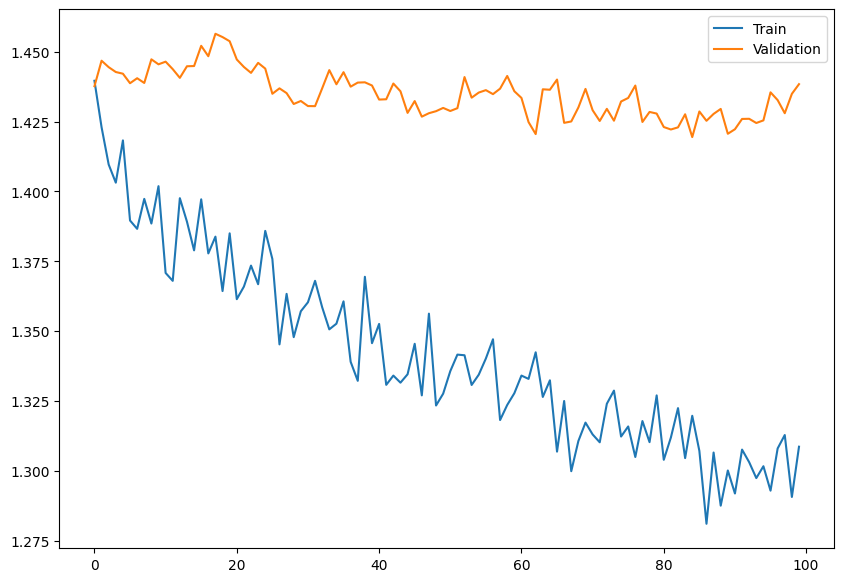

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
file_list_numd = np.arange(len(subjectnamesd))
test_index = file_list_numd
kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 100
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())
  #print(train_loss_epoch)
  batch_sz = 20
  expectedoutputdeap = []
  actualoutputdeap = []

  for tr in test_index:
      net.eval()
      v = data_de1[subjectnamesd[tr]]
      l = data_del[subjectnamesd[tr]]
      net.eval()
      val_loss = []
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i:i+batch_sz].shape)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #actualoutputdeap.append(torch.round(outputs.cpu()))
            #expectedoutputdeap.append(l[i:i+batch_sz])
            actualoutputdeap.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            expectedoutputdeap.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutputdeap = np.concatenate( expectedoutputdeap, axis=0 )
  actualoutputdeap = np.concatenate( actualoutputdeap, axis=0 )
  #print(expectedoutput.shape)
  #print(actualoutput.shape)
  print(classification_report(expectedoutputdeap,actualoutputdeap))
  print(confusion_matrix(expectedoutputdeap,actualoutputdeap))
  print(f'Validation Loss for {subjectnamesd[tr]} = {val_loss_mean}')
plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
plt.legend()

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 1/100, Train Loss: 1.3786548376083374


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.05      0.07       150
           1       0.24      0.26      0.25       183
           2       0.35      0.34      0.34       206
           3       0.20      0.31      0.24       181

    accuracy                           0.25       720
   macro avg       0.24      0.24      0.23       720
weighted avg       0.25      0.25      0.24       720

[[ 7 35 33 75]
 [11 48 41 83]
 [10 59 70 67]
 [ 9 60 56 56]]
Validation Loss for P20 = 1.395013689994812


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 2/100, Train Loss: 1.4325833320617676


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.19      0.04      0.07       150
           1       0.22      0.27      0.24       183
           2       0.33      0.27      0.30       206
           3       0.19      0.31      0.24       181

    accuracy                           0.23       720
   macro avg       0.23      0.22      0.21       720
weighted avg       0.24      0.23      0.22       720

[[ 6 37 27 80]
 [ 9 50 37 87]
 [ 7 72 55 72]
 [ 9 68 47 57]]
Validation Loss for P20 = 1.3950257301330566


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 3/100, Train Loss: 1.6141945123672485


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.27      0.08      0.12       150
           1       0.23      0.34      0.28       183
           2       0.31      0.19      0.23       206
           3       0.20      0.31      0.25       181

    accuracy                           0.24       720
   macro avg       0.25      0.23      0.22       720
weighted avg       0.26      0.24      0.23       720

[[12 41 26 71]
 [12 63 26 82]
 [10 87 39 70]
 [10 78 36 57]]
Validation Loss for P20 = 1.3857492208480835


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 4/100, Train Loss: 1.3762849569320679
              precision    recall  f1-score   support

           0       0.30      0.14      0.19       150
           1       0.24      0.33      0.28       183
           2       0.32      0.20      0.24       206
           3       0.21      0.30      0.25       181

    accuracy                           0.25       720
   macro avg       0.27      0.24      0.24       720
weighted avg       0.27      0.25      0.24       720

[[21 38 26 65]
 [19 61 27 76]
 [15 84 41 66]
 [15 76 35 55]]
Validation Loss for P20 = 1.3916927576065063


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 5/100, Train Loss: 1.432396411895752
              precision    recall  f1-score   support

           0       0.29      0.20      0.24       150
           1       0.23      0.34      0.27       183
           2       0.31      0.17      0.22       206
           3       0.22      0.28      0.25       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.24       720
weighted avg       0.26      0.25      0.24       720

[[30 41 22 57]
 [33 63 25 62]
 [21 93 35 57]
 [21 79 30 51]]
Validation Loss for P20 = 1.3851889371871948


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 6/100, Train Loss: 1.3732414245605469
              precision    recall  f1-score   support

           0       0.30      0.25      0.27       150
           1       0.23      0.37      0.29       183
           2       0.34      0.18      0.24       206
           3       0.21      0.23      0.22       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.26       720
weighted avg       0.27      0.26      0.25       720

[[38 41 22 49]
 [41 68 23 51]
 [25 93 38 50]
 [23 89 28 41]]
Validation Loss for P20 = 1.3846018314361572


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 7/100, Train Loss: 1.4354918003082275
              precision    recall  f1-score   support

           0       0.32      0.27      0.29       150
           1       0.24      0.38      0.29       183
           2       0.33      0.17      0.22       206
           3       0.23      0.26      0.24       181

    accuracy                           0.26       720
   macro avg       0.28      0.27      0.26       720
weighted avg       0.28      0.26      0.26       720

[[40 40 21 49]
 [39 69 20 55]
 [24 92 34 56]
 [22 85 27 47]]
Validation Loss for P20 = 1.3860467672348022


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 8/100, Train Loss: 1.2681573629379272
              precision    recall  f1-score   support

           0       0.33      0.29      0.31       150
           1       0.22      0.32      0.26       183
           2       0.31      0.18      0.23       206
           3       0.23      0.27      0.25       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.26       720
weighted avg       0.27      0.26      0.26       720

[[44 37 22 47]
 [43 58 27 55]
 [26 86 37 57]
 [22 78 33 48]]
Validation Loss for P20 = 1.3916314840316772


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 9/100, Train Loss: 1.4096972942352295
              precision    recall  f1-score   support

           0       0.32      0.28      0.30       150
           1       0.23      0.32      0.27       183
           2       0.31      0.17      0.22       206
           3       0.23      0.28      0.25       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.26       720
weighted avg       0.27      0.26      0.26       720

[[42 38 22 48]
 [41 59 27 56]
 [26 85 36 59]
 [21 77 33 50]]
Validation Loss for P20 = 1.3918544054031372


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 10/100, Train Loss: 1.3800230026245117
              precision    recall  f1-score   support

           0       0.32      0.29      0.31       150
           1       0.24      0.34      0.28       183
           2       0.34      0.16      0.21       206
           3       0.26      0.33      0.29       181

    accuracy                           0.27       720
   macro avg       0.29      0.28      0.27       720
weighted avg       0.29      0.27      0.27       720

[[44 36 20 50]
 [45 62 17 59]
 [26 87 32 61]
 [22 75 25 59]]
Validation Loss for P20 = 1.3857316970825195


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 11/100, Train Loss: 1.4674116373062134
              precision    recall  f1-score   support

           0       0.32      0.29      0.31       150
           1       0.22      0.28      0.25       183
           2       0.34      0.20      0.25       206
           3       0.25      0.31      0.28       181

    accuracy                           0.27       720
   macro avg       0.28      0.27      0.27       720
weighted avg       0.28      0.27      0.27       720

[[44 35 20 51]
 [45 52 28 58]
 [26 78 42 60]
 [23 68 34 56]]
Validation Loss for P20 = 1.3976337909698486


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 12/100, Train Loss: 1.4608349800109863
              precision    recall  f1-score   support

           0       0.33      0.32      0.32       150
           1       0.23      0.32      0.27       183
           2       0.33      0.17      0.22       206
           3       0.25      0.31      0.28       181

    accuracy                           0.27       720
   macro avg       0.29      0.28      0.27       720
weighted avg       0.28      0.27      0.27       720

[[48 36 19 47]
 [47 58 20 58]
 [28 84 34 60]
 [24 70 31 56]]
Validation Loss for P20 = 1.3865185976028442


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 13/100, Train Loss: 1.416643500328064
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       150
           1       0.23      0.30      0.26       183
           2       0.34      0.19      0.24       206
           3       0.25      0.30      0.27       181

    accuracy                           0.28       720
   macro avg       0.29      0.28      0.28       720
weighted avg       0.29      0.28      0.27       720

[[50 35 20 45]
 [48 55 23 57]
 [30 79 39 58]
 [25 69 33 54]]
Validation Loss for P20 = 1.3845261335372925


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 14/100, Train Loss: 1.4785704612731934
              precision    recall  f1-score   support

           0       0.34      0.31      0.33       150
           1       0.24      0.30      0.26       183
           2       0.34      0.17      0.23       206
           3       0.26      0.35      0.30       181

    accuracy                           0.28       720
   macro avg       0.29      0.28      0.28       720
weighted avg       0.29      0.28      0.27       720

[[47 34 20 49]
 [44 54 19 66]
 [25 77 36 68]
 [23 64 31 63]]
Validation Loss for P20 = 1.3882896900177002


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 15/100, Train Loss: 1.4287358522415161
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       150
           1       0.23      0.28      0.25       183
           2       0.32      0.18      0.23       206
           3       0.26      0.33      0.29       181

    accuracy                           0.27       720
   macro avg       0.28      0.28      0.28       720
weighted avg       0.28      0.27      0.27       720

[[49 33 21 47]
 [48 52 25 58]
 [26 79 37 64]
 [25 63 34 59]]
Validation Loss for P20 = 1.3895868062973022


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 16/100, Train Loss: 1.4118965864181519
              precision    recall  f1-score   support

           0       0.34      0.33      0.33       150
           1       0.22      0.26      0.24       183
           2       0.30      0.17      0.22       206
           3       0.26      0.33      0.29       181

    accuracy                           0.27       720
   macro avg       0.28      0.27      0.27       720
weighted avg       0.28      0.27      0.27       720

[[49 33 23 45]
 [47 48 28 60]
 [24 76 36 70]
 [25 62 34 60]]
Validation Loss for P20 = 1.3900340795516968


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 17/100, Train Loss: 1.43242347240448


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.32      0.29      0.31       150
           1       0.21      0.23      0.22       183
           2       0.33      0.16      0.22       206
           3       0.24      0.37      0.29       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.26       720
weighted avg       0.27      0.26      0.25       720

[[44 30 18 58]
 [45 42 21 75]
 [24 70 33 79]
 [25 62 27 67]]
Validation Loss for P20 = 1.3893141746520996


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 18/100, Train Loss: 1.4957069158554077


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.33      0.34      0.34       150
           1       0.20      0.22      0.21       183
           2       0.31      0.17      0.22       206
           3       0.26      0.36      0.30       181

    accuracy                           0.27       720
   macro avg       0.28      0.27      0.27       720
weighted avg       0.27      0.27      0.26       720

[[51 31 19 49]
 [48 40 28 67]
 [27 69 34 76]
 [27 60 28 66]]
Validation Loss for P20 = 1.386501431465149


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 19/100, Train Loss: 1.4662309885025024


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.33      0.33      0.33       150
           1       0.20      0.22      0.21       183
           2       0.33      0.15      0.21       206
           3       0.26      0.39      0.31       181

    accuracy                           0.27       720
   macro avg       0.28      0.27      0.27       720
weighted avg       0.28      0.27      0.26       720

[[50 31 16 53]
 [50 41 26 66]
 [24 70 31 81]
 [27 63 21 70]]
Validation Loss for P20 = 1.382900595664978


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 20/100, Train Loss: 1.44952392578125


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.32      0.30      0.31       150
           1       0.20      0.23      0.21       183
           2       0.30      0.16      0.21       206
           3       0.24      0.34      0.28       181

    accuracy                           0.25       720
   macro avg       0.26      0.26      0.25       720
weighted avg       0.26      0.25      0.25       720

[[45 32 23 50]
 [46 42 27 68]
 [25 73 33 75]
 [25 66 28 62]]
Validation Loss for P20 = 1.3914732933044434


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 21/100, Train Loss: 1.4871339797973633


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.31      0.30      0.31       150
           1       0.21      0.26      0.23       183
           2       0.31      0.15      0.20       206
           3       0.24      0.33      0.27       181

    accuracy                           0.25       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.25      0.25       720

[[45 33 19 53]
 [46 48 25 64]
 [26 75 31 74]
 [26 71 25 59]]
Validation Loss for P20 = 1.384176254272461


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 22/100, Train Loss: 1.4616886377334595


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.33      0.34      0.33       150
           1       0.22      0.25      0.23       183
           2       0.30      0.17      0.21       206
           3       0.24      0.31      0.27       181

    accuracy                           0.26       720
   macro avg       0.27      0.27      0.26       720
weighted avg       0.27      0.26      0.26       720

[[51 32 21 46]
 [51 46 28 58]
 [25 72 34 75]
 [29 63 32 57]]
Validation Loss for P20 = 1.3861039876937866


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 23/100, Train Loss: 1.3167163133621216


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.31      0.33      0.32       150
           1       0.21      0.22      0.21       183
           2       0.31      0.17      0.22       206
           3       0.24      0.34      0.28       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.26       720
weighted avg       0.27      0.26      0.25       720

[[49 28 21 52]
 [54 40 24 65]
 [26 65 35 80]
 [27 60 32 62]]
Validation Loss for P20 = 1.3856840133666992


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 24/100, Train Loss: 1.4529529809951782
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       150
           1       0.21      0.20      0.20       183
           2       0.29      0.17      0.22       206
           3       0.23      0.36      0.28       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.25       720
weighted avg       0.26      0.25      0.24       720

[[42 26 24 58]
 [47 36 27 73]
 [25 54 36 91]
 [26 53 37 65]]
Validation Loss for P20 = 1.397050142288208


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 25/100, Train Loss: 1.361546516418457
              precision    recall  f1-score   support

           0       0.30      0.29      0.30       150
           1       0.22      0.17      0.19       183
           2       0.31      0.19      0.24       206
           3       0.24      0.39      0.29       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[44 24 24 58]
 [49 31 29 74]
 [25 43 40 98]
 [29 44 37 71]]
Validation Loss for P20 = 1.3939355611801147


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 26/100, Train Loss: 1.4121289253234863
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       150
           1       0.23      0.21      0.22       183
           2       0.31      0.18      0.23       206
           3       0.24      0.38      0.29       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.26       720
weighted avg       0.27      0.26      0.26       720

[[42 27 23 58]
 [48 39 26 70]
 [24 51 38 93]
 [28 51 34 68]]
Validation Loss for P20 = 1.3923150300979614


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 27/100, Train Loss: 1.2760270833969116
              precision    recall  f1-score   support

           0       0.30      0.31      0.31       150
           1       0.24      0.22      0.23       183
           2       0.31      0.17      0.22       206
           3       0.25      0.38      0.30       181

    accuracy                           0.27       720
   macro avg       0.27      0.27      0.26       720
weighted avg       0.27      0.27      0.26       720

[[47 26 23 54]
 [52 41 27 63]
 [27 51 36 92]
 [29 53 31 68]]
Validation Loss for P20 = 1.384725570678711


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 28/100, Train Loss: 1.4550875425338745
              precision    recall  f1-score   support

           0       0.30      0.33      0.31       150
           1       0.21      0.15      0.17       183
           2       0.29      0.20      0.24       206
           3       0.25      0.40      0.31       181

    accuracy                           0.26       720
   macro avg       0.26      0.27      0.26       720
weighted avg       0.26      0.26      0.25       720

[[49 20 26 55]
 [54 27 34 68]
 [30 42 41 93]
 [30 41 38 72]]
Validation Loss for P20 = 1.3871922492980957


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 29/100, Train Loss: 1.4281527996063232
              precision    recall  f1-score   support

           0       0.28      0.28      0.28       150
           1       0.24      0.19      0.21       183
           2       0.31      0.20      0.24       206
           3       0.23      0.38      0.29       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.26       720
weighted avg       0.27      0.26      0.25       720

[[42 22 26 60]
 [52 34 27 70]
 [28 42 42 94]
 [28 43 42 68]]
Validation Loss for P20 = 1.3929675817489624


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 30/100, Train Loss: 1.3592039346694946
              precision    recall  f1-score   support

           0       0.28      0.25      0.26       150
           1       0.22      0.16      0.18       183
           2       0.31      0.24      0.27       206
           3       0.24      0.39      0.29       181

    accuracy                           0.26       720
   macro avg       0.26      0.26      0.25       720
weighted avg       0.26      0.26      0.25       720

[[37 21 31 61]
 [47 29 34 73]
 [22 42 49 93]
 [26 40 45 70]]
Validation Loss for P20 = 1.399171233177185


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 31/100, Train Loss: 1.5632905960083008


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.30      0.29      0.29       150
           1       0.22      0.17      0.19       183
           2       0.30      0.19      0.23       206
           3       0.23      0.39      0.29       181

    accuracy                           0.26       720
   macro avg       0.26      0.26      0.25       720
weighted avg       0.26      0.26      0.25       720

[[44 19 24 63]
 [50 31 28 74]
 [25 47 39 95]
 [30 43 38 70]]
Validation Loss for P20 = 1.3915079832077026


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 32/100, Train Loss: 1.3904696702957153


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.29      0.29      0.29       150
           1       0.22      0.16      0.19       183
           2       0.32      0.20      0.25       206
           3       0.24      0.39      0.30       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.26       720
weighted avg       0.27      0.26      0.25       720

[[44 20 25 61]
 [54 30 27 72]
 [26 45 42 93]
 [30 41 39 71]]
Validation Loss for P20 = 1.395860195159912


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 33/100, Train Loss: 1.4428266286849976
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       150
           1       0.23      0.17      0.19       183
           2       0.33      0.20      0.25       206
           3       0.23      0.39      0.29       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.26       720
weighted avg       0.27      0.26      0.25       720

[[43 20 23 64]
 [52 31 24 76]
 [24 44 42 96]
 [30 42 38 71]]
Validation Loss for P20 = 1.3919873237609863


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 34/100, Train Loss: 1.3773384094238281


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.29      0.29      0.29       150
           1       0.23      0.16      0.19       183
           2       0.34      0.23      0.28       206
           3       0.23      0.39      0.29       181

    accuracy                           0.27       720
   macro avg       0.27      0.27      0.26       720
weighted avg       0.27      0.27      0.26       720

[[43 19 25 63]
 [51 29 27 76]
 [25 39 48 94]
 [30 38 42 71]]
Validation Loss for P20 = 1.3940423727035522


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 35/100, Train Loss: 1.514923334121704
              precision    recall  f1-score   support

           0       0.27      0.25      0.26       150
           1       0.25      0.17      0.21       183
           2       0.34      0.24      0.28       206
           3       0.24      0.41      0.30       181

    accuracy                           0.27       720
   macro avg       0.28      0.27      0.26       720
weighted avg       0.28      0.27      0.26       720

[[38 20 25 67]
 [49 32 27 75]
 [25 39 50 92]
 [28 35 44 74]]
Validation Loss for P20 = 1.3955671787261963


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 36/100, Train Loss: 1.4910941123962402
              precision    recall  f1-score   support

           0       0.26      0.24      0.25       150
           1       0.22      0.15      0.18       183
           2       0.35      0.23      0.28       206
           3       0.24      0.41      0.30       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[36 18 26 70]
 [50 28 25 80]
 [25 40 47 94]
 [28 41 37 75]]
Validation Loss for P20 = 1.3939642906188965


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 37/100, Train Loss: 1.4706894159317017
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       150
           1       0.24      0.17      0.20       183
           2       0.34      0.21      0.26       206
           3       0.24      0.41      0.31       181

    accuracy                           0.27       720
   macro avg       0.28      0.27      0.26       720
weighted avg       0.28      0.27      0.26       720

[[44 19 24 63]
 [53 31 24 75]
 [27 41 44 94]
 [29 39 38 75]]
Validation Loss for P20 = 1.3943313360214233


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 38/100, Train Loss: 1.3668988943099976
              precision    recall  f1-score   support

           0       0.27      0.27      0.27       150
           1       0.24      0.14      0.18       183
           2       0.35      0.28      0.31       206
           3       0.24      0.40      0.30       181

    accuracy                           0.27       720
   macro avg       0.28      0.27      0.26       720
weighted avg       0.28      0.27      0.26       720

[[40 17 27 66]
 [50 26 31 76]
 [26 35 57 88]
 [30 32 47 72]]
Validation Loss for P20 = 1.3951696157455444


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 39/100, Train Loss: 1.365642786026001
              precision    recall  f1-score   support

           0       0.29      0.31      0.30       150
           1       0.24      0.13      0.17       183
           2       0.34      0.29      0.31       206
           3       0.24      0.39      0.29       181

    accuracy                           0.28       720
   macro avg       0.28      0.28      0.27       720
weighted avg       0.28      0.28      0.27       720

[[46 12 31 61]
 [54 23 32 74]
 [27 29 59 91]
 [31 30 50 70]]
Validation Loss for P20 = 1.3986937999725342


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 40/100, Train Loss: 1.4001562595367432
              precision    recall  f1-score   support

           0       0.28      0.29      0.28       150
           1       0.27      0.19      0.22       183
           2       0.36      0.23      0.28       206
           3       0.25      0.42      0.31       181

    accuracy                           0.28       720
   macro avg       0.29      0.28      0.27       720
weighted avg       0.29      0.28      0.27       720

[[43 17 25 65]
 [54 34 22 73]
 [29 37 47 93]
 [30 38 37 76]]
Validation Loss for P20 = 1.396028757095337


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 41/100, Train Loss: 1.3252089023590088
              precision    recall  f1-score   support

           0       0.27      0.27      0.27       150
           1       0.25      0.14      0.18       183
           2       0.34      0.25      0.29       206
           3       0.24      0.43      0.31       181

    accuracy                           0.27       720
   macro avg       0.28      0.27      0.26       720
weighted avg       0.28      0.27      0.26       720

[[40 15 28 67]
 [52 25 28 78]
 [27 28 52 99]
 [30 31 43 77]]
Validation Loss for P20 = 1.4004350900650024


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 42/100, Train Loss: 1.42940092086792
              precision    recall  f1-score   support

           0       0.26      0.25      0.26       150
           1       0.24      0.14      0.17       183
           2       0.32      0.21      0.26       206
           3       0.23      0.43      0.30       181

    accuracy                           0.26       720
   macro avg       0.26      0.26      0.25       720
weighted avg       0.26      0.26      0.25       720

[[ 38  16  29  67]
 [ 52  25  25  81]
 [ 28  29  44 105]
 [ 30  33  41  77]]
Validation Loss for P20 = 1.405346155166626


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 43/100, Train Loss: 1.3424659967422485
              precision    recall  f1-score   support

           0       0.25      0.23      0.24       150
           1       0.27      0.15      0.20       183
           2       0.31      0.25      0.28       206
           3       0.23      0.39      0.29       181

    accuracy                           0.26       720
   macro avg       0.26      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[34 13 34 69]
 [50 28 32 73]
 [25 31 52 98]
 [29 31 50 71]]
Validation Loss for P20 = 1.4055285453796387


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 44/100, Train Loss: 1.4264041185379028
              precision    recall  f1-score   support

           0       0.25      0.22      0.23       150
           1       0.25      0.10      0.14       183
           2       0.32      0.25      0.28       206
           3       0.23      0.45      0.31       181

    accuracy                           0.26       720
   macro avg       0.26      0.26      0.24       720
weighted avg       0.26      0.26      0.24       720

[[ 33   7  34  76]
 [ 48  18  31  86]
 [ 23  23  52 108]
 [ 29  25  45  82]]
Validation Loss for P20 = 1.414623498916626


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 45/100, Train Loss: 1.4397236108779907
              precision    recall  f1-score   support

           0       0.26      0.24      0.25       150
           1       0.27      0.13      0.17       183
           2       0.32      0.23      0.27       206
           3       0.24      0.45      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[ 36   9  31  74]
 [ 50  23  28  82]
 [ 25  26  47 108]
 [ 30  28  41  82]]
Validation Loss for P20 = 1.410177230834961


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 46/100, Train Loss: 1.3471945524215698
              precision    recall  f1-score   support

           0       0.25      0.23      0.24       150
           1       0.25      0.10      0.14       183
           2       0.31      0.24      0.27       206
           3       0.23      0.45      0.31       181

    accuracy                           0.26       720
   macro avg       0.26      0.26      0.24       720
weighted avg       0.27      0.26      0.24       720

[[ 35   7  33  75]
 [ 50  18  30  85]
 [ 24  23  50 109]
 [ 29  23  47  82]]
Validation Loss for P20 = 1.4093114137649536


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 47/100, Train Loss: 1.3278999328613281
              precision    recall  f1-score   support

           0       0.24      0.21      0.23       150
           1       0.27      0.11      0.16       183
           2       0.31      0.22      0.26       206
           3       0.24      0.47      0.32       181

    accuracy                           0.26       720
   macro avg       0.26      0.26      0.24       720
weighted avg       0.27      0.26      0.24       720

[[ 32   7  33  78]
 [ 50  21  28  84]
 [ 23  26  46 111]
 [ 28  25  43  85]]
Validation Loss for P20 = 1.4151554107666016


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 48/100, Train Loss: 1.381652593612671
              precision    recall  f1-score   support

           0       0.24      0.23      0.23       150
           1       0.26      0.13      0.17       183
           2       0.31      0.20      0.25       206
           3       0.24      0.46      0.31       181

    accuracy                           0.25       720
   macro avg       0.26      0.26      0.24       720
weighted avg       0.26      0.25      0.24       720

[[ 34  13  28  75]
 [ 50  24  25  84]
 [ 28  26  42 110]
 [ 29  30  39  83]]
Validation Loss for P20 = 1.4105792045593262


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 49/100, Train Loss: 1.4803730249404907
              precision    recall  f1-score   support

           0       0.24      0.21      0.23       150
           1       0.25      0.12      0.16       183
           2       0.29      0.19      0.23       206
           3       0.24      0.48      0.32       181

    accuracy                           0.25       720
   macro avg       0.25      0.25      0.23       720
weighted avg       0.26      0.25      0.23       720

[[ 32  11  32  75]
 [ 49  22  25  87]
 [ 26  27  40 113]
 [ 27  27  41  86]]
Validation Loss for P20 = 1.4192806482315063


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 50/100, Train Loss: 1.2935930490493774


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.24      0.25       150
           1       0.27      0.14      0.18       183
           2       0.31      0.22      0.26       206
           3       0.24      0.45      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[ 36  10  34  70]
 [ 51  25  25  82]
 [ 25  27  45 109]
 [ 29  29  42  81]]
Validation Loss for P20 = 1.4126050472259521


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 51/100, Train Loss: 1.3113785982131958


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.24      0.24       150
           1       0.29      0.13      0.18       183
           2       0.30      0.23      0.26       206
           3       0.24      0.45      0.32       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[ 36   8  35  71]
 [ 50  24  29  80]
 [ 28  27  47 104]
 [ 30  24  45  82]]
Validation Loss for P20 = 1.4124188423156738


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 52/100, Train Loss: 1.453054666519165


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.25      0.25       150
           1       0.28      0.14      0.18       183
           2       0.31      0.22      0.26       206
           3       0.24      0.45      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[ 37   9  32  72]
 [ 52  25  25  81]
 [ 29  28  45 104]
 [ 31  28  41  81]]
Validation Loss for P20 = 1.4115707874298096


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 53/100, Train Loss: 1.359265923500061


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.25      0.26       150
           1       0.27      0.14      0.18       183
           2       0.33      0.21      0.25       206
           3       0.24      0.45      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[ 38  10  30  72]
 [ 52  25  21  85]
 [ 28  28  43 107]
 [ 30  31  38  82]]
Validation Loss for P20 = 1.4090899229049683


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 54/100, Train Loss: 1.4168074131011963


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.21      0.23       150
           1       0.27      0.13      0.18       183
           2       0.31      0.23      0.27       206
           3       0.24      0.46      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[ 31   9  35  75]
 [ 45  24  27  87]
 [ 23  27  48 108]
 [ 25  29  44  83]]
Validation Loss for P20 = 1.4180448055267334


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 55/100, Train Loss: 1.4061158895492554


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.19      0.22       150
           1       0.29      0.16      0.20       183
           2       0.32      0.22      0.26       206
           3       0.23      0.46      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.28      0.26      0.25       720

[[ 29  12  33  76]
 [ 39  29  22  93]
 [ 25  28  46 107]
 [ 26  31  41  83]]
Validation Loss for P20 = 1.4163790941238403


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 56/100, Train Loss: 1.3115838766098022
              precision    recall  f1-score   support

           0       0.25      0.21      0.23       150
           1       0.27      0.13      0.18       183
           2       0.31      0.21      0.25       206
           3       0.23      0.46      0.31       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.24       720
weighted avg       0.27      0.25      0.24       720

[[ 32  10  33  75]
 [ 43  24  25  91]
 [ 25  27  44 110]
 [ 28  29  41  83]]
Validation Loss for P20 = 1.422773838043213


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 57/100, Train Loss: 1.2994753122329712
              precision    recall  f1-score   support

           0       0.25      0.24      0.25       150
           1       0.28      0.14      0.18       183
           2       0.31      0.21      0.25       206
           3       0.24      0.46      0.32       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.25       720

[[ 36   9  33  72]
 [ 48  25  25  85]
 [ 28  27  43 108]
 [ 31  27  39  84]]
Validation Loss for P20 = 1.413655161857605


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 58/100, Train Loss: 1.439710021018982
              precision    recall  f1-score   support

           0       0.24      0.21      0.22       150
           1       0.28      0.14      0.18       183
           2       0.30      0.22      0.26       206
           3       0.24      0.46      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.24       720
weighted avg       0.27      0.26      0.25       720

[[ 31   9  34  76]
 [ 42  25  28  88]
 [ 27  28  46 105]
 [ 27  27  44  83]]
Validation Loss for P20 = 1.4210704565048218


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 59/100, Train Loss: 1.3030771017074585
              precision    recall  f1-score   support

           0       0.26      0.25      0.25       150
           1       0.27      0.12      0.17       183
           2       0.31      0.21      0.25       206
           3       0.24      0.46      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.27      0.26      0.24       720

[[ 37  10  32  71]
 [ 46  22  24  91]
 [ 28  26  43 109]
 [ 32  24  41  84]]
Validation Loss for P20 = 1.4159802198410034


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 60/100, Train Loss: 1.3301799297332764
              precision    recall  f1-score   support

           0       0.24      0.23      0.23       150
           1       0.29      0.13      0.18       183
           2       0.32      0.23      0.27       206
           3       0.24      0.46      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.28      0.26      0.25       720

[[ 34   8  36  72]
 [ 47  23  25  88]
 [ 27  25  48 106]
 [ 33  22  43  83]]
Validation Loss for P20 = 1.4198089838027954


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 61/100, Train Loss: 1.3628511428833008


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.24      0.25       150
           1       0.28      0.12      0.17       183
           2       0.28      0.19      0.23       206
           3       0.24      0.47      0.31       181

    accuracy                           0.25       720
   macro avg       0.26      0.26      0.24       720
weighted avg       0.26      0.25      0.24       720

[[ 36   8  33  73]
 [ 48  22  25  88]
 [ 28  24  40 114]
 [ 28  25  43  85]]
Validation Loss for P20 = 1.419862151145935


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 62/100, Train Loss: 1.4140413999557495


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.25      0.25       150
           1       0.31      0.12      0.17       183
           2       0.30      0.22      0.26       206
           3       0.24      0.46      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.28      0.26      0.25       720

[[ 37   8  35  70]
 [ 49  22  28  84]
 [ 29  21  46 110]
 [ 32  21  45  83]]
Validation Loss for P20 = 1.4194167852401733


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 63/100, Train Loss: 1.3660939931869507
              precision    recall  f1-score   support

           0       0.25      0.24      0.25       150
           1       0.29      0.11      0.16       183
           2       0.29      0.20      0.24       206
           3       0.24      0.48      0.32       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.24       720
weighted avg       0.27      0.26      0.24       720

[[ 36   8  35  71]
 [ 47  20  26  90]
 [ 28  19  42 117]
 [ 32  21  42  86]]
Validation Loss for P20 = 1.425620675086975


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 64/100, Train Loss: 1.333431601524353
              precision    recall  f1-score   support

           0       0.24      0.23      0.24       150
           1       0.28      0.10      0.15       183
           2       0.31      0.22      0.26       206
           3       0.24      0.47      0.32       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.24       720
weighted avg       0.27      0.26      0.24       720

[[ 35   9  34  72]
 [ 49  19  27  88]
 [ 28  20  46 112]
 [ 34  21  41  85]]
Validation Loss for P20 = 1.4249634742736816


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 65/100, Train Loss: 1.4336779117584229
              precision    recall  f1-score   support

           0       0.24      0.22      0.23       150
           1       0.28      0.09      0.14       183
           2       0.30      0.22      0.26       206
           3       0.24      0.48      0.32       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.24       720
weighted avg       0.27      0.25      0.24       720

[[ 33   7  37  73]
 [ 45  17  27  94]
 [ 27  18  46 115]
 [ 31  19  44  87]]
Validation Loss for P20 = 1.4335987567901611


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 66/100, Train Loss: 1.4160616397857666
              precision    recall  f1-score   support

           0       0.26      0.27      0.26       150
           1       0.29      0.11      0.16       183
           2       0.32      0.21      0.26       206
           3       0.24      0.47      0.32       181

    accuracy                           0.26       720
   macro avg       0.28      0.27      0.25       720
weighted avg       0.28      0.26      0.25       720

[[ 40   9  30  71]
 [ 49  21  23  90]
 [ 30  22  44 110]
 [ 34  20  42  85]]
Validation Loss for P20 = 1.4190751314163208


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 67/100, Train Loss: 1.3226748704910278
              precision    recall  f1-score   support

           0       0.27      0.28      0.27       150
           1       0.28      0.10      0.15       183
           2       0.31      0.21      0.25       206
           3       0.23      0.46      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.28      0.26      0.25       720

[[ 42   6  31  71]
 [ 50  19  25  89]
 [ 29  21  44 112]
 [ 35  21  42  83]]
Validation Loss for P20 = 1.4192078113555908


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 68/100, Train Loss: 1.400561809539795
              precision    recall  f1-score   support

           0       0.26      0.25      0.26       150
           1       0.29      0.11      0.16       183
           2       0.28      0.20      0.24       206
           3       0.23      0.46      0.31       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.24       720
weighted avg       0.27      0.26      0.24       720

[[ 38   7  35  70]
 [ 46  20  26  91]
 [ 28  21  42 115]
 [ 32  20  45  84]]
Validation Loss for P20 = 1.4248809814453125


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 69/100, Train Loss: 1.3223838806152344
              precision    recall  f1-score   support

           0       0.26      0.27      0.26       150
           1       0.31      0.11      0.16       183
           2       0.28      0.18      0.22       206
           3       0.24      0.48      0.32       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.24       720
weighted avg       0.27      0.26      0.24       720

[[ 40   7  32  71]
 [ 49  20  22  92]
 [ 30  20  37 119]
 [ 35  18  41  87]]
Validation Loss for P20 = 1.4222854375839233


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 70/100, Train Loss: 1.4287675619125366
              precision    recall  f1-score   support

           0       0.25      0.24      0.24       150
           1       0.31      0.13      0.18       183
           2       0.31      0.22      0.26       206
           3       0.23      0.45      0.30       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.28      0.26      0.25       720

[[ 36   7  35  72]
 [ 47  23  23  90]
 [ 27  23  45 111]
 [ 35  22  43  81]]
Validation Loss for P20 = 1.423919677734375


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 71/100, Train Loss: 1.3738858699798584


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.27      0.26       150
           1       0.28      0.10      0.15       183
           2       0.33      0.23      0.27       206
           3       0.24      0.46      0.31       181

    accuracy                           0.26       720
   macro avg       0.28      0.26      0.25       720
weighted avg       0.28      0.26      0.25       720

[[ 40   8  31  71]
 [ 50  19  23  91]
 [ 30  21  47 108]
 [ 36  19  43  83]]
Validation Loss for P20 = 1.4208563566207886


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 72/100, Train Loss: 1.3723435401916504


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.22      0.23       150
           1       0.28      0.10      0.15       183
           2       0.30      0.20      0.24       206
           3       0.23      0.47      0.31       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.23       720
weighted avg       0.26      0.25      0.23       720

[[ 33   6  32  79]
 [ 44  19  23  97]
 [ 29  21  41 115]
 [ 33  21  42  85]]
Validation Loss for P20 = 1.425918459892273


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 73/100, Train Loss: 1.3768868446350098


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.27      0.26      0.26       150
           1       0.31      0.11      0.17       183
           2       0.32      0.23      0.27       206
           3       0.24      0.48      0.32       181

    accuracy                           0.27       720
   macro avg       0.29      0.27      0.26       720
weighted avg       0.29      0.27      0.26       720

[[ 39   7  33  71]
 [ 46  21  25  91]
 [ 26  20  48 112]
 [ 34  19  42  86]]
Validation Loss for P20 = 1.4276098012924194


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 74/100, Train Loss: 1.316617488861084


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.27      0.27      0.27       150
           1       0.31      0.12      0.17       183
           2       0.28      0.18      0.22       206
           3       0.24      0.49      0.32       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.25       720
weighted avg       0.28      0.26      0.24       720

[[ 40   8  30  72]
 [ 47  22  22  92]
 [ 31  21  37 117]
 [ 32  20  41  88]]
Validation Loss for P20 = 1.4251359701156616


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 75/100, Train Loss: 1.3346127271652222


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.25      0.25       150
           1       0.32      0.12      0.18       183
           2       0.30      0.20      0.24       206
           3       0.24      0.48      0.32       181

    accuracy                           0.26       720
   macro avg       0.28      0.26      0.25       720
weighted avg       0.28      0.26      0.24       720

[[ 37   7  32  74]
 [ 48  22  21  92]
 [ 29  20  41 116]
 [ 32  19  43  87]]
Validation Loss for P20 = 1.4253123998641968


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 76/100, Train Loss: 1.39272141456604


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.27      0.27      0.27       150
           1       0.30      0.10      0.15       183
           2       0.30      0.19      0.23       206
           3       0.24      0.49      0.32       181

    accuracy                           0.26       720
   macro avg       0.27      0.26      0.24       720
weighted avg       0.28      0.26      0.24       720

[[ 40   6  30  74]
 [ 49  18  20  96]
 [ 29  19  39 119]
 [ 32  17  43  89]]
Validation Loss for P20 = 1.430331826210022


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 77/100, Train Loss: 1.3191958665847778


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.27      0.26       150
           1       0.31      0.11      0.16       183
           2       0.27      0.17      0.21       206
           3       0.23      0.46      0.31       181

    accuracy                           0.25       720
   macro avg       0.27      0.25      0.24       720
weighted avg       0.27      0.25      0.23       720

[[ 40   5  33  72]
 [ 51  20  21  91]
 [ 32  20  36 118]
 [ 34  20  43  84]]
Validation Loss for P20 = 1.4265968799591064


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 78/100, Train Loss: 1.4080919027328491


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.26      0.26       150
           1       0.29      0.09      0.14       183
           2       0.27      0.19      0.22       206
           3       0.23      0.46      0.31       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.23       720
weighted avg       0.26      0.25      0.23       720

[[ 39   4  36  71]
 [ 48  17  24  94]
 [ 31  19  39 117]
 [ 34  18  45  84]]
Validation Loss for P20 = 1.4261431694030762


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 79/100, Train Loss: 1.4090197086334229


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.24      0.24       150
           1       0.24      0.06      0.10       183
           2       0.26      0.20      0.22       206
           3       0.23      0.46      0.30       181

    accuracy                           0.24       720
   macro avg       0.24      0.24      0.22       720
weighted avg       0.24      0.24      0.22       720

[[ 36   3  40  71]
 [ 47  11  29  96]
 [ 29  16  41 120]
 [ 32  16  49  84]]
Validation Loss for P20 = 1.4392848014831543


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 80/100, Train Loss: 1.3619149923324585


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.25      0.25       150
           1       0.27      0.08      0.12       183
           2       0.27      0.19      0.22       206
           3       0.23      0.48      0.31       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.23       720
weighted avg       0.26      0.25      0.22       720

[[ 37   4  36  73]
 [ 47  14  25  97]
 [ 30  16  39 121]
 [ 30  17  47  87]]
Validation Loss for P20 = 1.4434516429901123


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 81/100, Train Loss: 1.3831453323364258


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.25      0.25       150
           1       0.22      0.06      0.09       183
           2       0.28      0.19      0.23       206
           3       0.23      0.49      0.31       181

    accuracy                           0.24       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.24      0.22       720

[[ 37   4  32  77]
 [ 48  11  25  99]
 [ 28  16  39 123]
 [ 31  18  44  88]]
Validation Loss for P20 = 1.4426054954528809


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 82/100, Train Loss: 1.415124773979187


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.23      0.24       150
           1       0.22      0.06      0.09       183
           2       0.26      0.19      0.22       206
           3       0.23      0.48      0.31       181

    accuracy                           0.24       720
   macro avg       0.24      0.24      0.22       720
weighted avg       0.24      0.24      0.21       720

[[ 35   4  35  76]
 [ 49  11  31  92]
 [ 31  15  39 121]
 [ 32  19  43  87]]
Validation Loss for P20 = 1.443824052810669


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 83/100, Train Loss: 1.349381923675537


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.23      0.23       150
           1       0.24      0.07      0.10       183
           2       0.28      0.18      0.22       206
           3       0.23      0.50      0.32       181

    accuracy                           0.24       720
   macro avg       0.25      0.24      0.22       720
weighted avg       0.25      0.24      0.22       720

[[ 34   5  33  78]
 [ 47  12  26  98]
 [ 29  15  38 124]
 [ 31  19  41  90]]
Validation Loss for P20 = 1.441904902458191


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 84/100, Train Loss: 1.2657169103622437


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.25      0.25       150
           1       0.24      0.07      0.10       183
           2       0.28      0.18      0.22       206
           3       0.23      0.50      0.31       181

    accuracy                           0.24       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.24      0.22       720

[[ 37   5  30  78]
 [ 47  12  24 100]
 [ 30  14  37 125]
 [ 32  18  41  90]]
Validation Loss for P20 = 1.4380468130111694


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 85/100, Train Loss: 1.4805272817611694


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.25      0.25       150
           1       0.24      0.07      0.11       183
           2       0.27      0.17      0.21       206
           3       0.23      0.49      0.32       181

    accuracy                           0.24       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.24      0.22       720

[[ 38   5  31  76]
 [ 50  13  24  96]
 [ 31  17  36 122]
 [ 33  19  40  89]]
Validation Loss for P20 = 1.4365437030792236


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 86/100, Train Loss: 1.4127854108810425


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.25      0.25       150
           1       0.25      0.07      0.11       183
           2       0.28      0.19      0.22       206
           3       0.23      0.48      0.31       181

    accuracy                           0.24       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.24      0.22       720

[[ 37   4  32  77]
 [ 48  13  25  97]
 [ 30  17  39 120]
 [ 31  18  45  87]]
Validation Loss for P20 = 1.4379585981369019


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 87/100, Train Loss: 1.3399147987365723


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.22      0.23       150
           1       0.24      0.07      0.11       183
           2       0.26      0.18      0.22       206
           3       0.23      0.49      0.31       181

    accuracy                           0.24       720
   macro avg       0.24      0.24      0.22       720
weighted avg       0.24      0.24      0.22       720

[[ 33   5  36  76]
 [ 46  13  27  97]
 [ 28  17  38 123]
 [ 30  19  44  88]]
Validation Loss for P20 = 1.4438918828964233


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 88/100, Train Loss: 1.4325392246246338


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.23      0.24       150
           1       0.23      0.07      0.11       183
           2       0.28      0.18      0.22       206
           3       0.23      0.49      0.31       181

    accuracy                           0.24       720
   macro avg       0.25      0.24      0.22       720
weighted avg       0.25      0.24      0.22       720

[[ 34   6  34  76]
 [ 42  13  26 102]
 [ 30  17  38 121]
 [ 32  20  40  89]]
Validation Loss for P20 = 1.4420650005340576


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 89/100, Train Loss: 1.363416314125061


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.23      0.24       150
           1       0.24      0.07      0.11       183
           2       0.28      0.18      0.22       206
           3       0.23      0.50      0.32       181

    accuracy                           0.24       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.24      0.22       720

[[ 35   5  34  76]
 [ 47  13  27  96]
 [ 30  15  38 123]
 [ 32  22  37  90]]
Validation Loss for P20 = 1.4478563070297241


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 90/100, Train Loss: 1.3840723037719727


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.24      0.24       150
           1       0.23      0.08      0.12       183
           2       0.28      0.18      0.22       206
           3       0.23      0.50      0.32       181

    accuracy                           0.25       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.25      0.22       720

[[ 36   6  31  77]
 [ 45  14  26  98]
 [ 30  18  37 121]
 [ 33  22  36  90]]
Validation Loss for P20 = 1.4470598697662354


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 91/100, Train Loss: 1.3619394302368164


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.23      0.24       150
           1       0.25      0.07      0.11       183
           2       0.27      0.19      0.22       206
           3       0.24      0.50      0.32       181

    accuracy                           0.25       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.25      0.22       720

[[ 35   5  32  78]
 [ 46  13  34  90]
 [ 29  15  39 123]
 [ 33  20  37  91]]
Validation Loss for P20 = 1.4501768350601196


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 92/100, Train Loss: 1.3474868535995483


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.24      0.24       150
           1       0.24      0.07      0.11       183
           2       0.28      0.18      0.22       206
           3       0.24      0.51      0.33       181

    accuracy                           0.25       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.25      0.22       720

[[ 36   6  31  77]
 [ 48  13  25  97]
 [ 29  16  37 124]
 [ 32  19  37  93]]
Validation Loss for P20 = 1.4460501670837402


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 93/100, Train Loss: 1.416760802268982


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.23      0.24       150
           1       0.25      0.07      0.11       183
           2       0.28      0.19      0.23       206
           3       0.24      0.51      0.32       181

    accuracy                           0.25       720
   macro avg       0.25      0.25      0.23       720
weighted avg       0.26      0.25      0.22       720

[[ 35   5  33  77]
 [ 46  13  27  97]
 [ 28  15  39 124]
 [ 30  19  40  92]]
Validation Loss for P20 = 1.4489227533340454


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 94/100, Train Loss: 1.3858531713485718


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.23      0.24       150
           1       0.25      0.08      0.12       183
           2       0.28      0.19      0.22       206
           3       0.23      0.49      0.31       181

    accuracy                           0.24       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.24      0.22       720

[[ 35   6  33  76]
 [ 45  14  27  97]
 [ 29  16  39 122]
 [ 31  20  42  88]]
Validation Loss for P20 = 1.4474579095840454


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 95/100, Train Loss: 1.453468680381775


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.23      0.24       150
           1       0.26      0.09      0.13       183
           2       0.28      0.18      0.22       206
           3       0.24      0.51      0.32       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.23       720
weighted avg       0.26      0.25      0.23       720

[[ 34   6  33  77]
 [ 44  16  25  98]
 [ 27  19  37 123]
 [ 30  20  39  92]]
Validation Loss for P20 = 1.4538081884384155


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 96/100, Train Loss: 1.3578640222549438


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.24      0.23      0.24       150
           1       0.23      0.07      0.11       183
           2       0.28      0.18      0.22       206
           3       0.24      0.51      0.32       181

    accuracy                           0.24       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.24      0.22       720

[[ 34   5  33  78]
 [ 46  13  26  98]
 [ 28  18  37 123]
 [ 31  21  37  92]]
Validation Loss for P20 = 1.4543708562850952


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 97/100, Train Loss: 1.4862966537475586


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.26      0.24      0.25       150
           1       0.23      0.07      0.11       183
           2       0.28      0.18      0.22       206
           3       0.24      0.51      0.32       181

    accuracy                           0.25       720
   macro avg       0.25      0.25      0.22       720
weighted avg       0.25      0.25      0.22       720

[[ 36   5  31  78]
 [ 46  13  26  98]
 [ 28  18  37 123]
 [ 31  21  37  92]]
Validation Loss for P20 = 1.4508620500564575


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 98/100, Train Loss: 1.3742969036102295


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           0       0.25      0.22      0.23       150
           1       0.27      0.08      0.13       183
           2       0.29      0.20      0.24       206
           3       0.23      0.50      0.31       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.23       720
weighted avg       0.26      0.25      0.23       720

[[ 33   5  32  80]
 [ 41  15  25 102]
 [ 27  16  41 122]
 [ 30  20  41  90]]
Validation Loss for P20 = 1.4593164920806885


/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 99/100, Train Loss: 1.3711893558502197
              precision    recall  f1-score   support

           0       0.25      0.22      0.23       150
           1       0.25      0.08      0.12       183
           2       0.29      0.19      0.23       206
           3       0.23      0.50      0.31       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.23       720
weighted avg       0.26      0.25      0.23       720

[[ 33   6  33  78]
 [ 42  15  25 101]
 [ 26  16  40 124]
 [ 30  22  39  90]]
Validation Loss for P20 = 1.4551116228103638


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_173/4145799004.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 100/100, Train Loss: 1.3312634229660034
              precision    recall  f1-score   support

           0       0.25      0.23      0.24       150
           1       0.26      0.08      0.12       183
           2       0.29      0.19      0.23       206
           3       0.24      0.52      0.33       181

    accuracy                           0.25       720
   macro avg       0.26      0.25      0.23       720
weighted avg       0.26      0.25      0.23       720

[[ 34   6  32  78]
 [ 43  15  28  97]
 [ 29  16  39 122]
 [ 32  20  35  94]]
Validation Loss for P20 = 1.4578160047531128


/tmp/ipykernel_173/4145799004.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


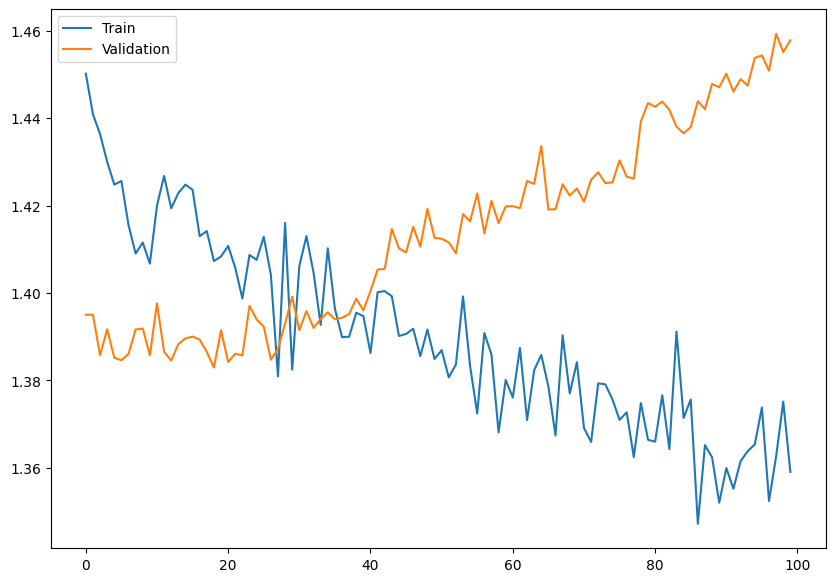

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
file_list_numd = np.arange(len(subjectnamesd))

kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_numd
test_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 100
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())
  #print(train_loss_epoch)
  batch_sz = 20
  expectedoutputamigos = []
  actualoutputamigos = []

  for tr in test_index:
      net.eval()

      v = data_c1d[newsubjectname[tr]]
      l = data_c2[newsubjectname[tr]]
      net.eval()
      val_loss = []
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i:i+batch_sz].shape)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #actualoutputamigos.append(torch.round(outputs.cpu()))
            #expectedoutputamigos.append(l[i:i+batch_sz])
            actualoutputamigos.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            expectedoutputamigos.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutputamigos = np.concatenate( expectedoutputamigos, axis=0 )
  actualoutputamigos = np.concatenate( actualoutputamigos, axis=0 )
  #print(expectedoutput.shape)
  #print(actualoutput.shape)
  print(classification_report(expectedoutputamigos,actualoutputamigos))
  print(confusion_matrix(expectedoutputamigos,actualoutputamigos))
  print(f'Validation Loss for {newsubjectname[tr]} = {val_loss_mean}')
plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
plt.legend()